In [275]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Power_Actual DataSet
power = pd.read_csv("/Users/apple/Downloads/Assignment for Data Scientist/power_actual_v - power_actual.csv")
power.head()

,Unnamed: 0,datetime,ghi,gti,power,power1
0,0,2017-10-01 0:00:00,0.0,0.0,0.0,0.0
1,1,2017-10-01 0:15:00,0.0,0.0,0.0,0.0
2,2,2017-10-01 0:30:00,0.0,0.0,0.0,0.0
3,3,2017-10-01 0:45:00,0.0,0.0,0.0,0.0
4,4,2017-10-01 1:00:00,0.0,0.0,0.0,0.0


In [4]:
#shape of power
power.shape

(70080, 6)

In [5]:
#Summary of Power DataSet
power.describe()

,Unnamed: 0,ghi,gti,power,power1
count,70080.000000,35040.0,35040.0,70080.000000,70080.000000
mean,35039.500000,0.0,0.0,28.612915,3.097488
std,20230.497769,0.0,0.0,498.795887,4.914481
min,0.000000,0.0,0.0,0.000000,0.000000
25%,17519.750000,0.0,0.0,0.000000,0.000000
50%,35039.500000,0.0,0.0,0.000000,0.000000
75%,52559.250000,0.0,0.0,5.540000,5.430000
max,70079.000000,0.0,0.0,16172.040000,18.340000


Observed that "Power" variable is having some of the data points are in watt and most of them are Kilowatt.
So, I have converted all the values into Kilowatt by using Excel.

In [6]:
#Removing unwanted Data Variables
power1=power.drop(["Unnamed: 0","ghi","gti","power"],axis=1)
power1.head()

,datetime,power1
0,2017-10-01 0:00:00,0.0
1,2017-10-01 0:15:00,0.0
2,2017-10-01 0:30:00,0.0
3,2017-10-01 0:45:00,0.0
4,2017-10-01 1:00:00,0.0


In [7]:
#datetime conversion
power1['datetime'] = pd.to_datetime(power1.datetime) 
  
power1.head()

,datetime,power1
0,2017-10-01 00:00:00,0.0
1,2017-10-01 00:15:00,0.0
2,2017-10-01 00:30:00,0.0
3,2017-10-01 00:45:00,0.0
4,2017-10-01 01:00:00,0.0


In [8]:
power1['hours'] = power1['datetime'].dt.hour
power1.head()

,datetime,power1,hours
0,2017-10-01 00:00:00,0.0,0
1,2017-10-01 00:15:00,0.0,0
2,2017-10-01 00:30:00,0.0,0
3,2017-10-01 00:45:00,0.0,0
4,2017-10-01 01:00:00,0.0,1


In [9]:
power1['date'] = power1['datetime'].dt.date
power1.head()

,datetime,power1,hours,date
0,2017-10-01 00:00:00,0.0,0,2017-10-01
1,2017-10-01 00:15:00,0.0,0,2017-10-01
2,2017-10-01 00:30:00,0.0,0,2017-10-01
3,2017-10-01 00:45:00,0.0,0,2017-10-01
4,2017-10-01 01:00:00,0.0,1,2017-10-01


In [10]:
power1.set_index('datetime',inplace=True)

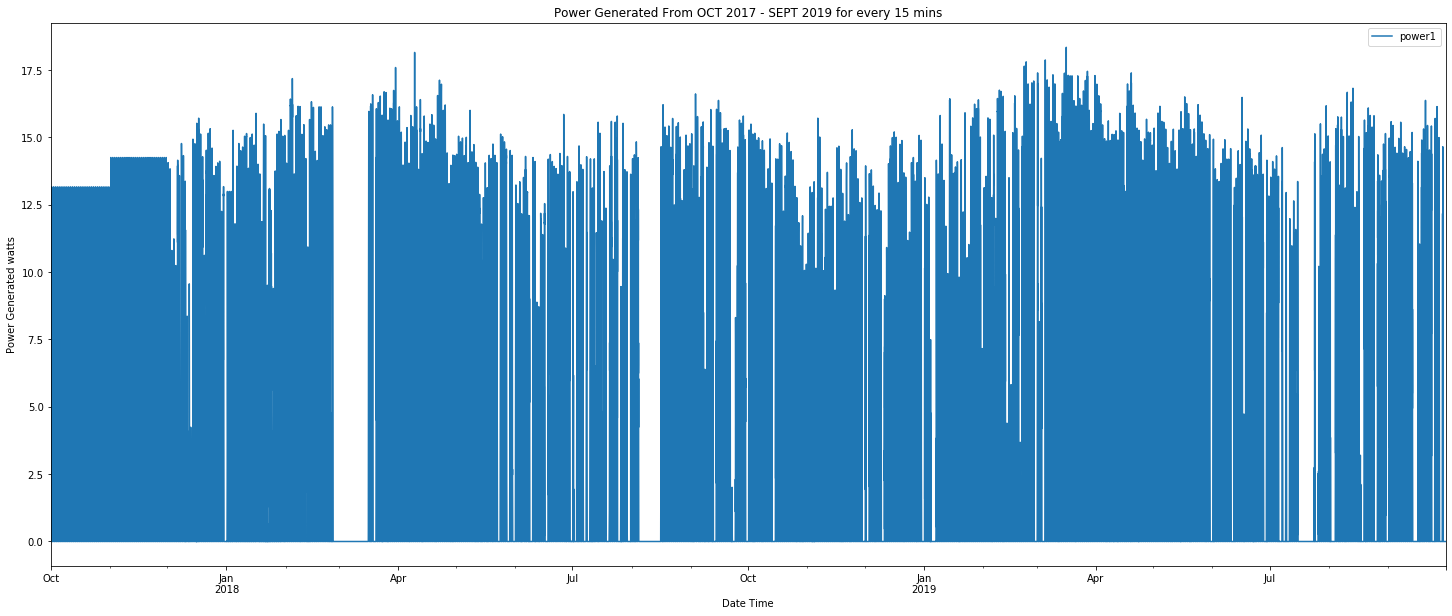

In [11]:
power1['power1'].plot(figsize=(25,10)).plot(label='Power for every 15 mins')
plt.title('Power Generated From OCT 2017 - SEPT 2019 for every 15 mins')
plt.xlabel("Date Time")
plt.ylabel("Power Generated watts")
plt.legend()


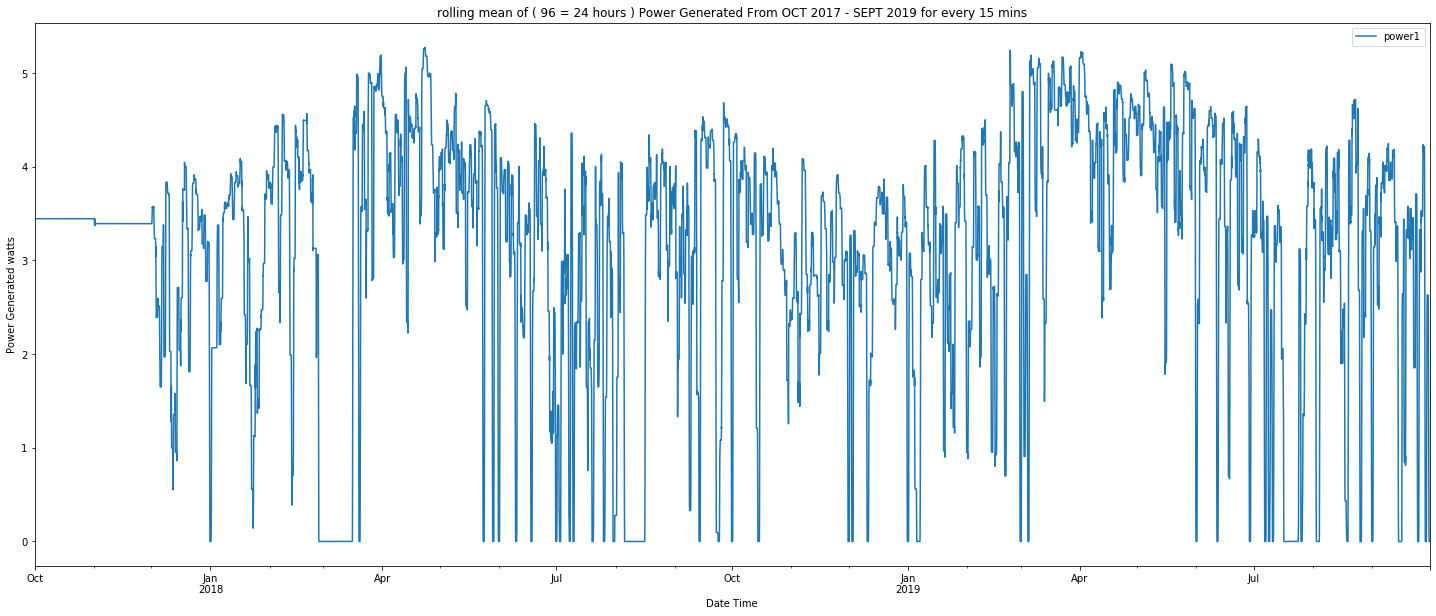

In [12]:
power1['power1'].rolling(window=96).mean().plot(figsize=(25,10))
plt.title('rolling mean of ( 96 = 24 hours ) Power Generated From OCT 2017 - SEPT 2019 for every 15 mins')
plt.xlabel("Date Time")
plt.ylabel("Power Generated watts")
plt.legend()


In [13]:
power1['date'].nunique()

730

In [14]:
power1.dtypes

power1    float64
hours       int64
date       object
dtype: object

In [15]:
power1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70080 entries, 2017-10-01 00:00:00 to 2019-09-30 23:45:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power1  70080 non-null  float64
 1   hours   70080 non-null  int64  
 2   date    70080 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [16]:

power1.isnull().sum()

power1    0
hours     0
date      0
dtype: int64

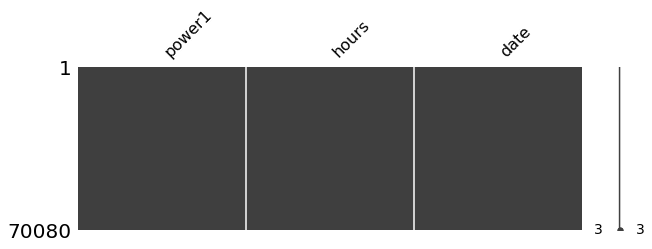

In [17]:
# Finding number of null values by Plot
import missingno
missingno.matrix(power1, figsize = (10,3))

In [18]:
# Power if sumed up for each day by using groupby . so that we have one value for each day..reset_index()
power2=power1.groupby([power1['date']])['power1'].sum().to_frame()
power2

,power1
date,
2017-10-01,330.84
2017-10-02,330.84
2017-10-03,330.84
2017-10-04,330.84
2017-10-05,330.84
...,...
2019-09-26,333.15
2019-09-27,404.75
2019-09-28,0.00


In [19]:
power2.shape

(730, 1)

In [20]:


power2['power1'].nunique()

587

In [21]:
power2['power1'].describe()

count    730.000000
mean     297.358818
std      134.525717
min        0.000000
25%      250.412500
50%      330.840000
75%      389.525000
max      504.960000
Name: power1, dtype: float64

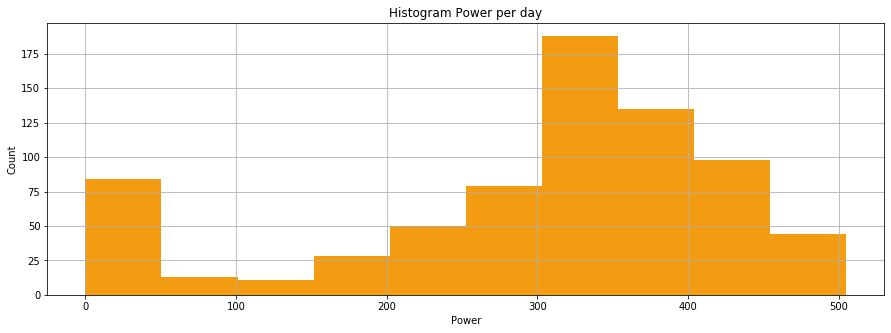

In [22]:
#Histogam for "power"
power2["power1"].hist(figsize = (15,5), color='#F39C12')
#plt.label("power ")
plt.title("Histogram Power per day")
plt.xlabel("Power")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Power per day (KW)')

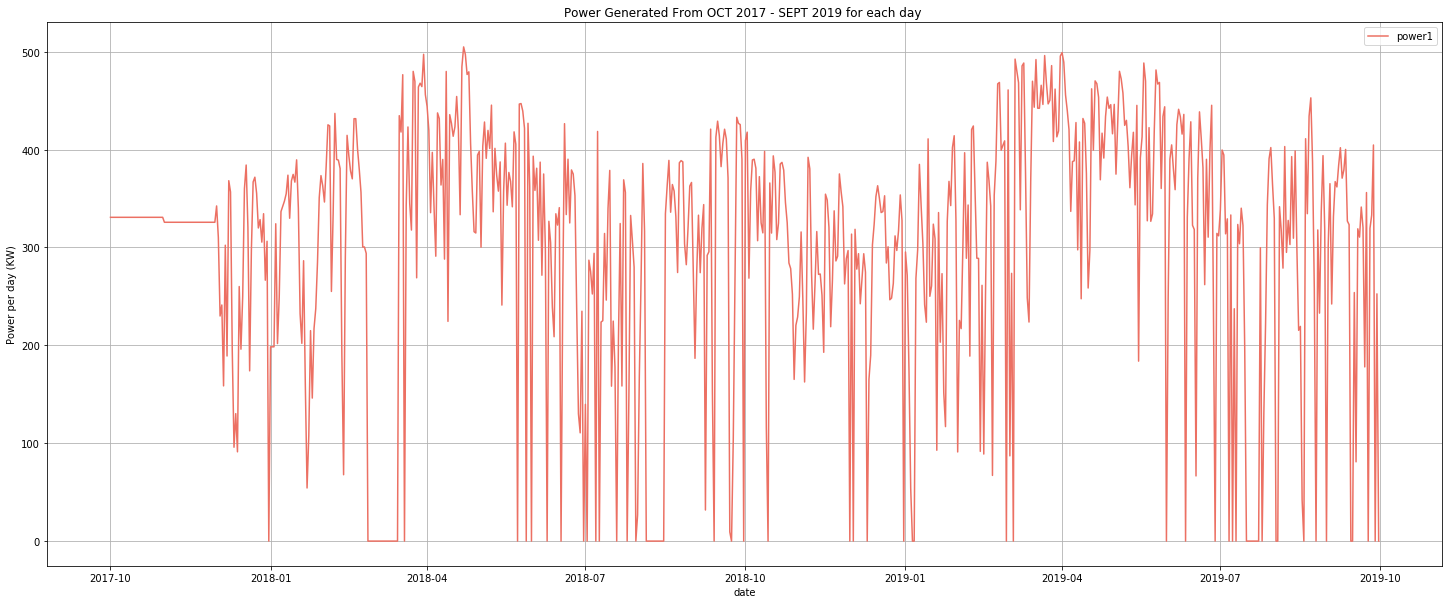

In [23]:
power2.plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('Power Generated From OCT 2017 - SEPT 2019 for each day ')
plt.ylabel('Power per day (KW)')

Text(0, 0.5, 'Power per day (KW)')

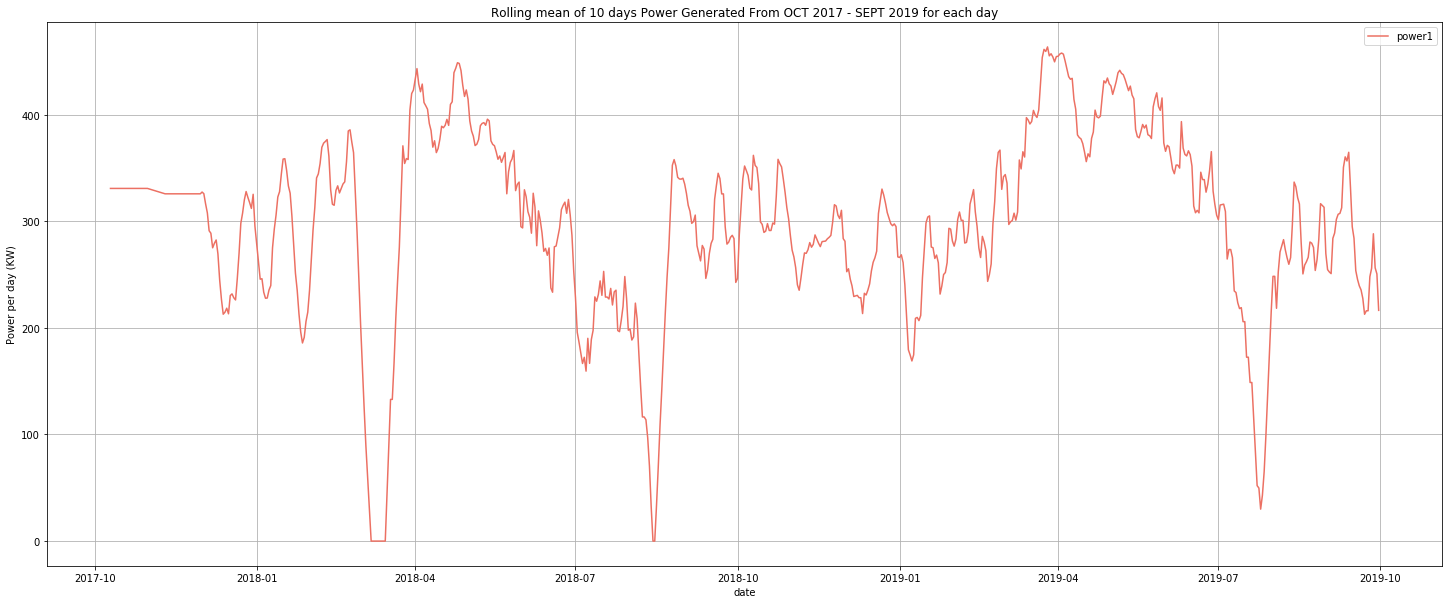

In [24]:
# Rolling mean of 10 days 
power_mean =power2['power1'].rolling(window=10).mean()
power_mean.plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('Rolling mean of 10 days Power Generated From OCT 2017 - SEPT 2019 for each day')
plt.ylabel('Power per day (KW)')

# Weather Actual 

In [25]:
weather = pd.read_csv("/Users/apple/Downloads/Assignment for Data Scientist/weather_actuals - weather_actuals.csv")
weather.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2017-09-30 18:30:00,2017-10-01 0:00:00,0.0,26.52,26,1,19.46,308.0,...,NaN,NaN,NaN,rain,3.57,2017-10-01 0:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,1,1,2017-09-30 19:30:00,2017-10-01 1:00:00,0.0,28.78,27,1,20.06,NaN,...,NaN,NaN,NaN,rain,3.06,2017-10-01 0:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2,1,2017-09-30 20:30:00,2017-10-01 2:00:00,0.0,26.58,26,1,19.97,NaN,...,NaN,NaN,NaN,rain,3.06,2017-10-01 0:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,3,1,2017-09-30 21:30:00,2017-10-01 3:00:00,0.0,23.84,23,1,18.66,270.0,...,NaN,NaN,NaN,rain,3.56,2017-10-01 0:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,4,1,2017-09-30 22:30:00,2017-10-01 4:00:00,0.0,24.13,24,1,17.84,NaN,...,NaN,NaN,NaN,rain,3.06,2017-10-01 0:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


Replaced "-9999" with NaN value with the help of Google Spread Sheets.

In [26]:
weather.columns

Index(['Unnamed: 0', 'plant_id', 'datetime_utc', 'datetime_local',
       'cloud_cover', 'apparent_temperature', 'temperature', 'humidity',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_chill', 'wind_gust',
       'heat_index', 'pressure', 'qpf', 'uv_index', 'snow', 'pop', 'fctcode',
       'ozone', 'precip_accumulation', 'precip_intensity',
       'precip_probability', 'precip_type', 'visibility', 'sunrise', 'sunset',
       'icon', 'summary', 'updated_at'],
      dtype='object')

In [27]:
weather.shape

(13619, 31)

In [28]:
weather.isnull().sum()

Unnamed: 0                  0
plant_id                    0
datetime_utc                0
datetime_local              0
cloud_cover               428
apparent_temperature        0
temperature                 0
humidity                    0
dew_point                   0
wind_bearing              919
wind_speed                740
wind_chill              13619
wind_gust                3264
heat_index              13619
pressure                 2156
qpf                     13619
uv_index                 3264
snow                    13619
pop                     13619
fctcode                 13619
ozone                    3264
precip_accumulation     13619
precip_intensity         3264
precip_probability       3264
precip_type              7472
visibility                176
sunrise                     0
sunset                      0
icon                        0
summary                     0
updated_at                  0
dtype: int64

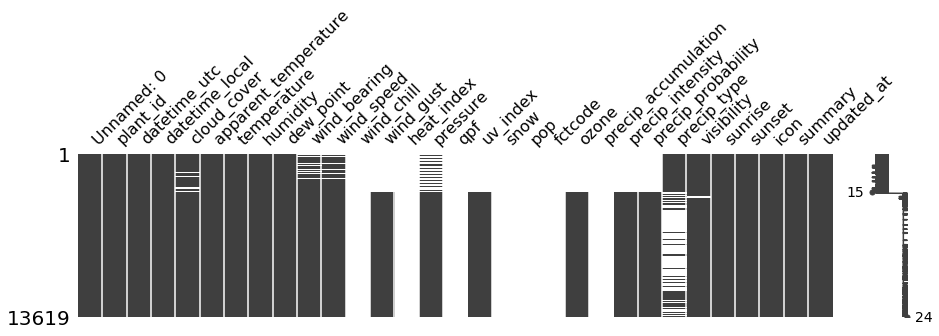

In [29]:
# Finding null values by Plot
missingno.matrix(weather, figsize = (15,3) )

In [30]:
weather.describe()

,Unnamed: 0,plant_id,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,...,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,visibility
count,13619.000000,13619.0,13191.000000,13619.000000,13619.000000,13619.000000,13619.000000,12700.000000,12879.000000,0.0,...,0.0,10355.000000,0.0,0.0,0.0,10355.000000,0.0,10355.000000,10355.000000,13443.000000
mean,6809.000000,1.0,0.237562,25.944639,24.498054,0.537411,11.924626,188.786929,2.638890,NaN,...,NaN,1.871270,NaN,NaN,NaN,274.459707,NaN,0.058259,0.018400,12.290986
std,3931.610993,0.0,0.342890,10.469808,8.840016,0.498617,9.129459,110.879924,1.290817,NaN,...,NaN,2.925569,NaN,NaN,NaN,15.247242,NaN,0.251135,0.055627,6.211356
min,0.000000,1.0,0.000000,3.140000,5.000000,0.000000,-20.560000,0.000000,0.000000,NaN,...,NaN,0.000000,NaN,NaN,NaN,225.800000,NaN,0.000000,0.000000,0.000000
25%,3404.500000,1.0,0.000000,17.310000,17.000000,0.000000,5.920000,91.000000,1.760000,NaN,...,NaN,0.000000,NaN,NaN,NaN,267.800000,NaN,0.000000,0.000000,3.670000
50%,6809.000000,1.0,0.010000,25.540000,25.000000,1.000000,10.710000,177.000000,2.520000,NaN,...,NaN,0.000000,NaN,NaN,NaN,275.600000,NaN,0.000000,0.000000,16.090000
75%,10213.500000,1.0,0.430000,34.580000,31.000000,1.000000,19.670000,298.000000,3.400000,NaN,...,NaN,3.000000,NaN,NaN,NaN,283.900000,NaN,0.010000,0.010000,16.090000
max,13618.000000,1.0,1.000000,49.750000,47.000000,1.000000,28.350000,359.000000,9.730000,NaN,...,NaN,12.000000,NaN,NaN,NaN,351.700000,NaN,6.220000,0.730000,16.090000


In [31]:
weather['wind_gust'].describe()

count    10355.000000
mean         4.245261
std          2.177424
min          0.630000
25%          2.695000
50%          3.740000
75%          5.340000
max         15.150000
Name: wind_gust, dtype: float64

In [32]:
weather['heat_index'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: heat_index, dtype: float64

In [33]:
weather['pressure'].describe()

count    11463.000000
mean      1009.074974
std          7.765399
min        991.660000
25%       1002.110000
50%       1009.600000
75%       1015.625000
max       1025.690000
Name: pressure, dtype: float64

In [34]:
weather1=weather.drop(["Unnamed: 0",'plant_id','wind_chill','heat_index','qpf','snow', 'pop', 'fctcode','precip_accumulation'],axis=1)
weather1.head()

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,...,ozone,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,2017-09-30 18:30:00,2017-10-01 0:00:00,0.0,26.52,26,1,19.46,308.0,0.83,NaN,...,NaN,NaN,NaN,rain,3.57,2017-10-01 0:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,2017-09-30 19:30:00,2017-10-01 1:00:00,0.0,28.78,27,1,20.06,NaN,NaN,NaN,...,NaN,NaN,NaN,rain,3.06,2017-10-01 0:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2017-09-30 20:30:00,2017-10-01 2:00:00,0.0,26.58,26,1,19.97,NaN,NaN,NaN,...,NaN,NaN,NaN,rain,3.06,2017-10-01 0:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,2017-09-30 21:30:00,2017-10-01 3:00:00,0.0,23.84,23,1,18.66,270.0,0.45,NaN,...,NaN,NaN,NaN,rain,3.56,2017-10-01 0:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,2017-09-30 22:30:00,2017-10-01 4:00:00,0.0,24.13,24,1,17.84,NaN,NaN,NaN,...,NaN,NaN,NaN,rain,3.06,2017-10-01 0:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [35]:
weather1.columns

Index(['datetime_utc', 'datetime_local', 'cloud_cover', 'apparent_temperature',
       'temperature', 'humidity', 'dew_point', 'wind_bearing', 'wind_speed',
       'wind_gust', 'pressure', 'uv_index', 'ozone', 'precip_intensity',
       'precip_probability', 'precip_type', 'visibility', 'sunrise', 'sunset',
       'icon', 'summary', 'updated_at'],
      dtype='object')

In [36]:
weather1.shape

(13619, 22)

In [37]:
weather1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13619 entries, 0 to 13618
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime_utc          13619 non-null  object 
 1   datetime_local        13619 non-null  object 
 2   cloud_cover           13191 non-null  float64
 3   apparent_temperature  13619 non-null  float64
 4   temperature           13619 non-null  int64  
 5   humidity              13619 non-null  int64  
 6   dew_point             13619 non-null  float64
 7   wind_bearing          12700 non-null  float64
 8   wind_speed            12879 non-null  float64
 9   wind_gust             10355 non-null  float64
 10  pressure              11463 non-null  float64
 11  uv_index              10355 non-null  float64
 12  ozone                 10355 non-null  float64
 13  precip_intensity      10355 non-null  float64
 14  precip_probability    10355 non-null  float64
 15  precip_type        

In [38]:
weather1.isnull().sum()

datetime_utc               0
datetime_local             0
cloud_cover              428
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_bearing             919
wind_speed               740
wind_gust               3264
pressure                2156
uv_index                3264
ozone                   3264
precip_intensity        3264
precip_probability      3264
precip_type             7472
visibility               176
sunrise                    0
sunset                     0
icon                       0
summary                    0
updated_at                 0
dtype: int64

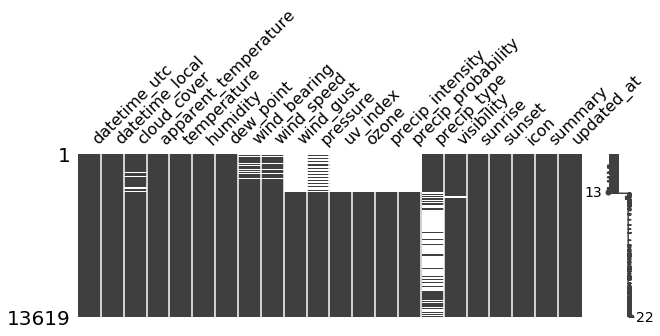

In [39]:
# Finding number of null values by Plot
missingno.matrix(weather1, figsize = (10,3))

In [40]:
from sklearn.impute import SimpleImputer
from numpy import nan

In [41]:
weather1['cloud_cover'] = weather1['cloud_cover'].fillna(0.23)

In [42]:
weather1['cloud_cover'].isnull().sum()

0

In [43]:
weather1['wind_bearing'] = weather1['wind_bearing'].fillna(188)

In [44]:
weather1['wind_bearing'].isnull().sum()

0

In [45]:
weather1['wind_speed'] = weather1['wind_speed'].fillna(2.63)

In [46]:
weather1['wind_speed'].isnull().sum()

0

In [47]:
weather1['wind_gust'] = weather1['wind_gust'].fillna(4.24)

In [48]:
weather1['wind_gust'].isnull().sum()

0

In [49]:
weather1['pressure'] = weather1['pressure'].fillna(1009.07)

In [50]:
weather1['pressure'].isnull().sum()

0

In [51]:
weather1['uv_index'] = weather1['uv_index'].fillna(1)

In [52]:
weather1['uv_index'].isnull().sum()

0

In [53]:
weather1['ozone'] = weather1['ozone'].fillna(274.4)

In [54]:
weather1['ozone'].isnull().sum()

0

In [55]:
weather1['precip_intensity'] = weather1['precip_intensity'].fillna(0.05)

In [56]:
weather1['precip_intensity'].isnull().sum()

0

In [57]:
weather1['precip_probability'] = weather1['precip_probability'].fillna(0.01)

In [58]:
weather1['precip_probability'].isnull().sum()

0

In [59]:
weather1['precip_type'].unique()

array(['rain', nan], dtype=object)

In [60]:
weather1['precip_type'] = weather1['precip_type'].fillna('no rain')

In [61]:
weather1['precip_type'].isnull().sum()

0

In [62]:
weather1['visibility'] = weather1['visibility'].fillna(12.2)

In [63]:
weather1['visibility'].isnull().sum()

0

In [64]:
weather1.isnull().sum()

datetime_utc            0
datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
precip_type             0
visibility              0
sunrise                 0
sunset                  0
icon                    0
summary                 0
updated_at              0
dtype: int64

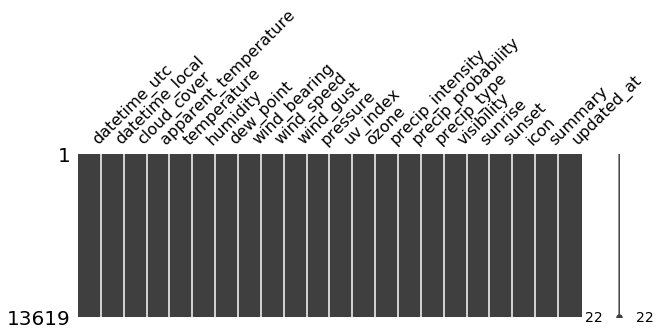

In [65]:
# Finding number of null values by Plot
missingno.matrix(weather1, figsize = (10,3))

In [66]:
weather1.describe()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility
count,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000
mean,0.237324,25.944639,24.498054,0.537411,11.924626,188.733828,2.638407,4.244000,1009.074187,1.662457,274.445398,0.056279,0.016387,12.289811
std,0.337462,10.469808,8.840016,0.498617,9.129459,107.073440,1.255257,1.898631,7.124220,2.577956,13.295036,0.219008,0.048637,6.171097
min,0.000000,3.140000,5.000000,0.000000,-20.560000,0.000000,0.000000,0.630000,991.660000,0.000000,225.800000,0.000000,0.000000,0.000000
25%,0.000000,17.310000,17.000000,0.000000,5.920000,96.000000,1.810000,3.015000,1003.500000,0.000000,270.300000,0.000000,0.000000,3.780000
50%,0.010000,25.540000,25.000000,1.000000,10.710000,188.000000,2.620000,4.240000,1009.070000,1.000000,274.400000,0.000000,0.000000,16.090000
75%,0.410000,34.580000,31.000000,1.000000,19.670000,293.000000,3.330000,4.710000,1014.740000,2.000000,280.800000,0.050000,0.010000,16.090000
max,1.000000,49.750000,47.000000,1.000000,28.350000,359.000000,9.730000,15.150000,1025.690000,12.000000,351.700000,6.220000,0.730000,16.090000


In [67]:
weather1.columns

Index(['datetime_utc', 'datetime_local', 'cloud_cover', 'apparent_temperature',
       'temperature', 'humidity', 'dew_point', 'wind_bearing', 'wind_speed',
       'wind_gust', 'pressure', 'uv_index', 'ozone', 'precip_intensity',
       'precip_probability', 'precip_type', 'visibility', 'sunrise', 'sunset',
       'icon', 'summary', 'updated_at'],
      dtype='object')

In [68]:
#datetime conversion
weather1['datetime_utc'] = pd.to_datetime(weather1.datetime_utc)

weather1['datetime_local'] = pd.to_datetime(weather1.datetime_local)

weather1['sunrise'] = pd.to_datetime(weather1.sunrise)

weather1['sunset'] = pd.to_datetime(weather1.sunset)

weather1['updated_at'] = pd.to_datetime(weather1.updated_at)

In [69]:
weather1.head()

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,...,ozone,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.0,0.83,4.24,...,274.4,0.05,0.01,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,188.0,2.63,4.24,...,274.4,0.05,0.01,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,188.0,2.63,4.24,...,274.4,0.05,0.01,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.0,0.45,4.24,...,274.4,0.05,0.01,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,188.0,2.63,4.24,...,274.4,0.05,0.01,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [70]:
Act_weather=weather1.copy()

In [71]:
Act_weather.head()

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,...,ozone,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.0,0.83,4.24,...,274.4,0.05,0.01,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,188.0,2.63,4.24,...,274.4,0.05,0.01,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,188.0,2.63,4.24,...,274.4,0.05,0.01,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.0,0.45,4.24,...,274.4,0.05,0.01,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,188.0,2.63,4.24,...,274.4,0.05,0.01,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [72]:
Act_weather.shape

(13619, 22)

In [73]:
Act_weather=Act_weather.drop(["datetime_utc","sunrise","sunset","updated_at"],axis=1)
Act_weather.head()

,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,precip_type,visibility,icon,summary
0,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.0,0.83,4.24,1007.90,1.0,274.4,0.05,0.01,rain,3.57,clear-night,Clear
1,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,188.0,2.63,4.24,1009.07,1.0,274.4,0.05,0.01,rain,3.06,fog,Foggy
2,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,188.0,2.63,4.24,1009.07,1.0,274.4,0.05,0.01,rain,3.06,fog,Foggy
3,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.0,0.45,4.24,1008.12,1.0,274.4,0.05,0.01,rain,3.56,clear-night,Clear
4,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,188.0,2.63,4.24,1009.07,1.0,274.4,0.05,0.01,rain,3.06,fog,Foggy


In [74]:
Act_weather['date'] = Act_weather['datetime_local'].dt.date
Act_weather.head()

,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,precip_type,visibility,icon,summary,date
0,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.0,0.83,4.24,1007.90,1.0,274.4,0.05,0.01,rain,3.57,clear-night,Clear,2017-10-01
1,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,188.0,2.63,4.24,1009.07,1.0,274.4,0.05,0.01,rain,3.06,fog,Foggy,2017-10-01
2,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,188.0,2.63,4.24,1009.07,1.0,274.4,0.05,0.01,rain,3.06,fog,Foggy,2017-10-01
3,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.0,0.45,4.24,1008.12,1.0,274.4,0.05,0.01,rain,3.56,clear-night,Clear,2017-10-01
4,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,188.0,2.63,4.24,1009.07,1.0,274.4,0.05,0.01,rain,3.06,fog,Foggy,2017-10-01


In [75]:
Act_weather['datetime_local'].nunique()

13619

In [76]:
Act_weather['date'].nunique()

568

In [77]:
Act_weather.columns

Index(['datetime_local', 'cloud_cover', 'apparent_temperature', 'temperature',
       'humidity', 'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust',
       'pressure', 'uv_index', 'ozone', 'precip_intensity',
       'precip_probability', 'precip_type', 'visibility', 'icon', 'summary',
       'date'],
      dtype='object')

In [78]:
Act_weather_df = Act_weather.groupby(['date'])[['cloud_cover', 'apparent_temperature', 'temperature',
       'humidity', 'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust',
       'pressure', 'uv_index', 'ozone', 'precip_intensity',
       'precip_probability', 'visibility']].mean()

In [79]:
Act_weather_df.head()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility
date,,,,,,,,,,,,,,
2017-10-01,0.0000,29.876667,29.375000,0.541667,17.369583,244.500000,2.485833,4.24,1008.482917,1.0,274.4,0.05,0.01,3.761667
2017-10-02,0.0000,29.584167,29.291667,0.500000,16.819583,261.250000,2.347083,4.24,1008.091250,1.0,274.4,0.05,0.01,3.903750
2017-10-03,0.0000,30.060833,28.958333,0.583333,18.680000,277.916667,1.970000,4.24,1008.445000,1.0,274.4,0.05,0.01,3.629583
2017-10-04,0.0075,30.525417,29.333333,0.583333,19.312500,275.125000,2.160000,4.24,1008.931250,1.0,274.4,0.05,0.01,3.537083
2017-10-05,0.0000,31.225833,30.208333,0.541667,18.753750,238.125000,2.166667,4.24,1008.997917,1.0,274.4,0.05,0.01,3.494167


In [80]:
Act_weather_df.to_csv('Act_weather_df.csv')

In [81]:
Act_weather_df.shape

(568, 14)

In [82]:
Act_weather_df1 = Act_weather.groupby(['date'])[['precip_type', 'icon', 'summary']].max()

In [83]:
Act_weather_df1

,precip_type,icon,summary
date,,,
2017-10-01,rain,fog,Foggy
2017-10-02,rain,fog,Foggy
2017-10-03,rain,fog,Foggy
2017-10-04,rain,fog,Foggy
2017-10-05,rain,fog,Foggy
...,...,...,...
2019-09-26,rain,partly-cloudy-night,Partly Cloudy
2019-09-27,rain,partly-cloudy-night,Partly Cloudy
2019-09-28,rain,partly-cloudy-night,Partly Cloudy


In [84]:
Actual_weather=Act_weather_df.join(Act_weather_df1)
Actual_weather.head()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,precip_type,icon,summary
date,,,,,,,,,,,,,,,,,
2017-10-01,0.0000,29.876667,29.375000,0.541667,17.369583,244.500000,2.485833,4.24,1008.482917,1.0,274.4,0.05,0.01,3.761667,rain,fog,Foggy
2017-10-02,0.0000,29.584167,29.291667,0.500000,16.819583,261.250000,2.347083,4.24,1008.091250,1.0,274.4,0.05,0.01,3.903750,rain,fog,Foggy
2017-10-03,0.0000,30.060833,28.958333,0.583333,18.680000,277.916667,1.970000,4.24,1008.445000,1.0,274.4,0.05,0.01,3.629583,rain,fog,Foggy
2017-10-04,0.0075,30.525417,29.333333,0.583333,19.312500,275.125000,2.160000,4.24,1008.931250,1.0,274.4,0.05,0.01,3.537083,rain,fog,Foggy
2017-10-05,0.0000,31.225833,30.208333,0.541667,18.753750,238.125000,2.166667,4.24,1008.997917,1.0,274.4,0.05,0.01,3.494167,rain,fog,Foggy


In [85]:
# joining Actual_weather and Actual_Power Datasets
dataframe=Actual_weather.join(power2)
dataframe.head()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,precip_type,icon,summary,power1
date,,,,,,,,,,,,,,,,,,
2017-10-01,0.0000,29.876667,29.375000,0.541667,17.369583,244.500000,2.485833,4.24,1008.482917,1.0,274.4,0.05,0.01,3.761667,rain,fog,Foggy,330.84
2017-10-02,0.0000,29.584167,29.291667,0.500000,16.819583,261.250000,2.347083,4.24,1008.091250,1.0,274.4,0.05,0.01,3.903750,rain,fog,Foggy,330.84
2017-10-03,0.0000,30.060833,28.958333,0.583333,18.680000,277.916667,1.970000,4.24,1008.445000,1.0,274.4,0.05,0.01,3.629583,rain,fog,Foggy,330.84
2017-10-04,0.0075,30.525417,29.333333,0.583333,19.312500,275.125000,2.160000,4.24,1008.931250,1.0,274.4,0.05,0.01,3.537083,rain,fog,Foggy,330.84
2017-10-05,0.0000,31.225833,30.208333,0.541667,18.753750,238.125000,2.166667,4.24,1008.997917,1.0,274.4,0.05,0.01,3.494167,rain,fog,Foggy,330.84


In [86]:
dataframe.shape

(568, 18)

In [87]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
dataframe['icon']=labelencoder.fit_transform(dataframe['icon'])
dataframe['summary']=labelencoder.fit_transform(dataframe['summary'])

In [88]:
dataframe=pd.get_dummies(dataframe,columns=["precip_type"],drop_first=True)
dataframe.head()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,icon,summary,power1,precip_type_rain
date,,,,,,,,,,,,,,,,,,
2017-10-01,0.0000,29.876667,29.375000,0.541667,17.369583,244.500000,2.485833,4.24,1008.482917,1.0,274.4,0.05,0.01,3.761667,2,1,330.84,1
2017-10-02,0.0000,29.584167,29.291667,0.500000,16.819583,261.250000,2.347083,4.24,1008.091250,1.0,274.4,0.05,0.01,3.903750,2,1,330.84,1
2017-10-03,0.0000,30.060833,28.958333,0.583333,18.680000,277.916667,1.970000,4.24,1008.445000,1.0,274.4,0.05,0.01,3.629583,2,1,330.84,1
2017-10-04,0.0075,30.525417,29.333333,0.583333,19.312500,275.125000,2.160000,4.24,1008.931250,1.0,274.4,0.05,0.01,3.537083,2,1,330.84,1
2017-10-05,0.0000,31.225833,30.208333,0.541667,18.753750,238.125000,2.166667,4.24,1008.997917,1.0,274.4,0.05,0.01,3.494167,2,1,330.84,1


In [89]:
dataframe.columns

Index(['cloud_cover', 'apparent_temperature', 'temperature', 'humidity',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'visibility', 'icon', 'summary', 'power1', 'precip_type_rain'],
      dtype='object')

In [90]:
dataframe.dtypes

cloud_cover             float64
apparent_temperature    float64
temperature             float64
humidity                float64
dew_point               float64
wind_bearing            float64
wind_speed              float64
wind_gust               float64
pressure                float64
uv_index                float64
ozone                   float64
precip_intensity        float64
precip_probability      float64
visibility              float64
icon                      int64
summary                   int64
power1                  float64
precip_type_rain          uint8
dtype: object

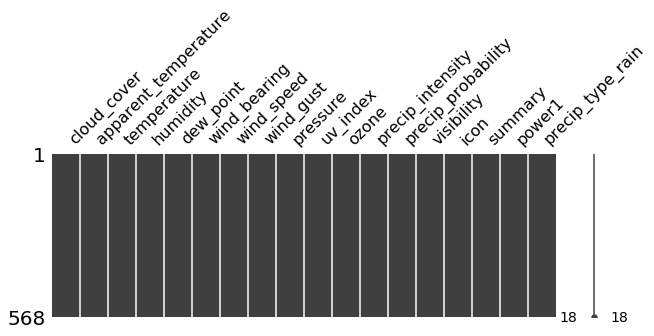

In [91]:
# Finding number of null values by Plot
missingno.matrix(dataframe, figsize = (10,3))

# pairplot

In [92]:
#pairplot
sns.pairplot(dataframe)

Text(0, 0.5, 'Cloud unit measure ( okta )')

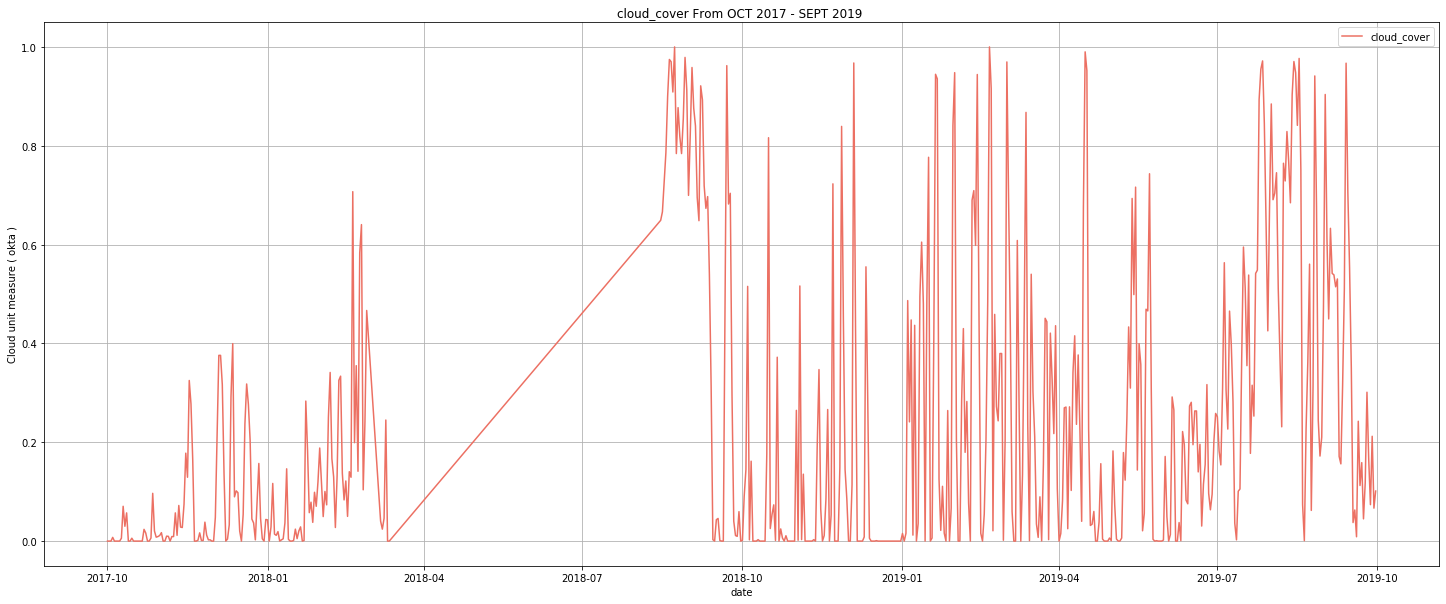

In [93]:
dataframe['cloud_cover'].plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('cloud_cover From OCT 2017 - SEPT 2019 ')
plt.ylabel('Cloud unit measure ( okta )')

Text(0, 0.5, 'Cloud unit measure ( okta )')

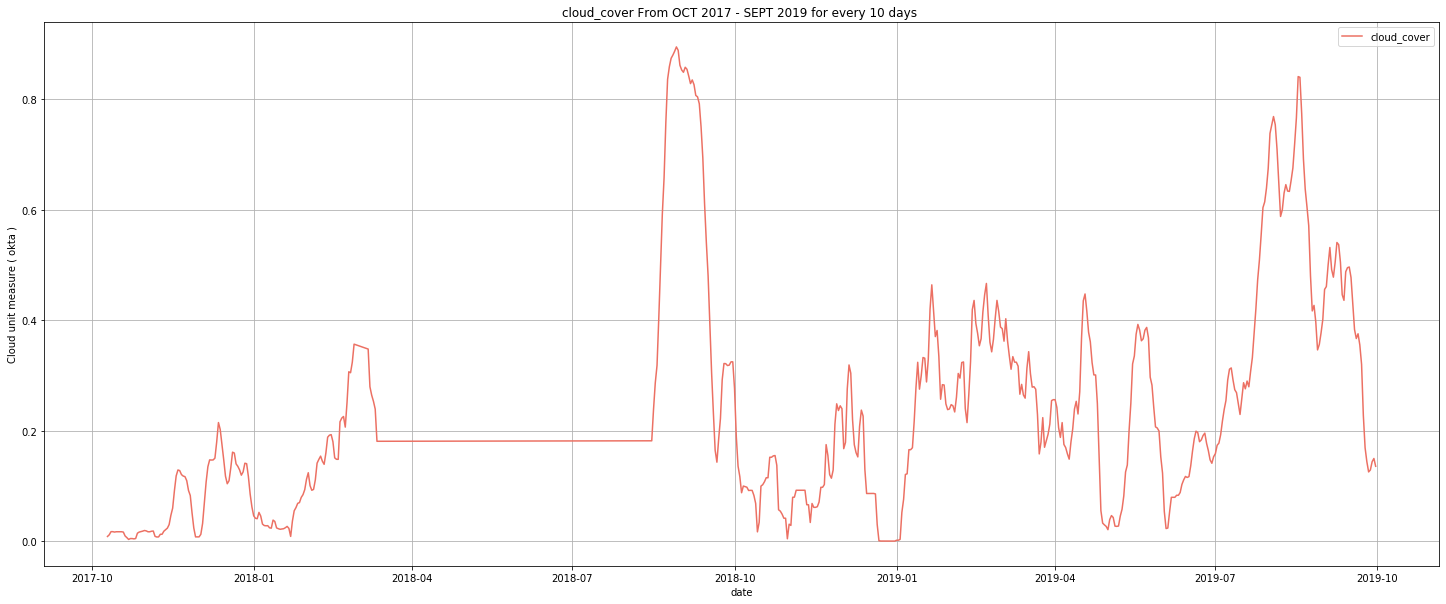

In [94]:
cloud_mean =dataframe['cloud_cover'].rolling(window=10).mean()
cloud_mean.plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('cloud_cover From OCT 2017 - SEPT 2019 for every 10 days ')
plt.ylabel('Cloud unit measure ( okta )')

Text(0, 0.5, 'Temperature (Celcius)')

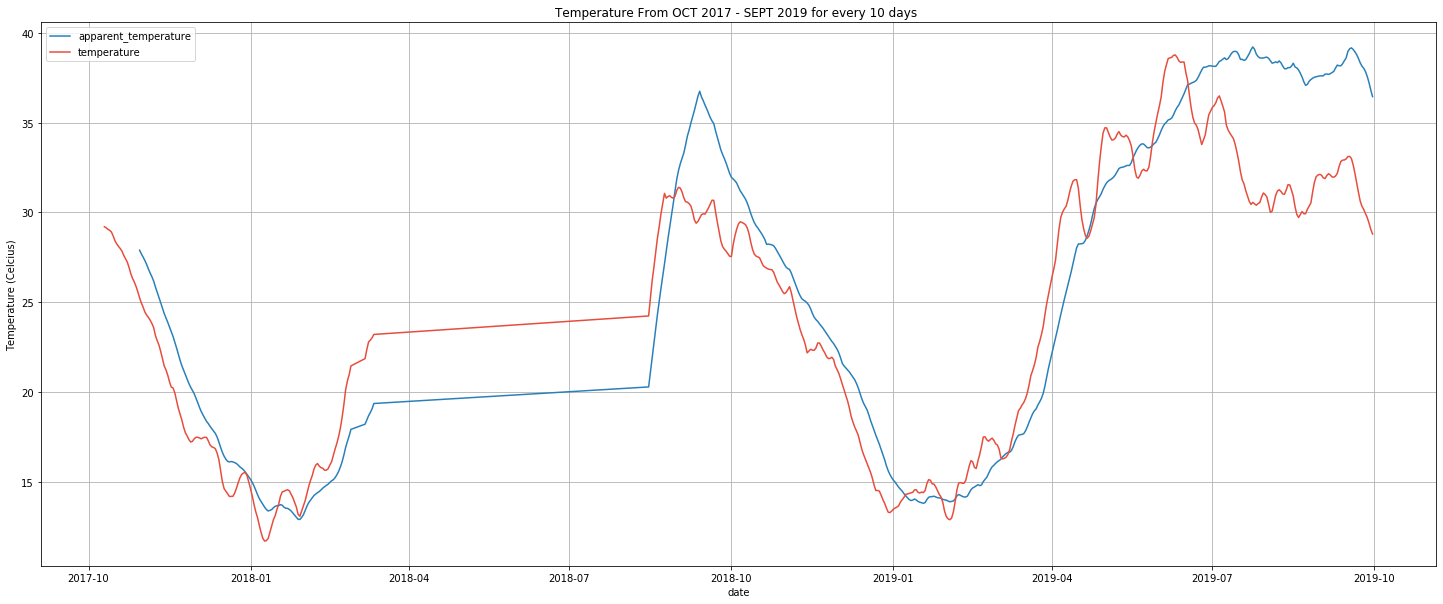

In [95]:
apparent_temperature =dataframe['apparent_temperature'].rolling(window=30).mean()
temperature =dataframe['temperature'].rolling(window=10).mean()
apparent_temperature.plot(grid=True, figsize=(25,10), legend=True,  color='#2980B9')
temperature.plot(grid=True, figsize=(25,10), legend=True,  color='#E74C3C')
plt.title('apparent_temperature vs Temperature From OCT 2017 - SEPT 2019 for every 10 days ')
plt.ylabel('Temperature (Celcius)')

Text(0, 0.5, 'humidity value')

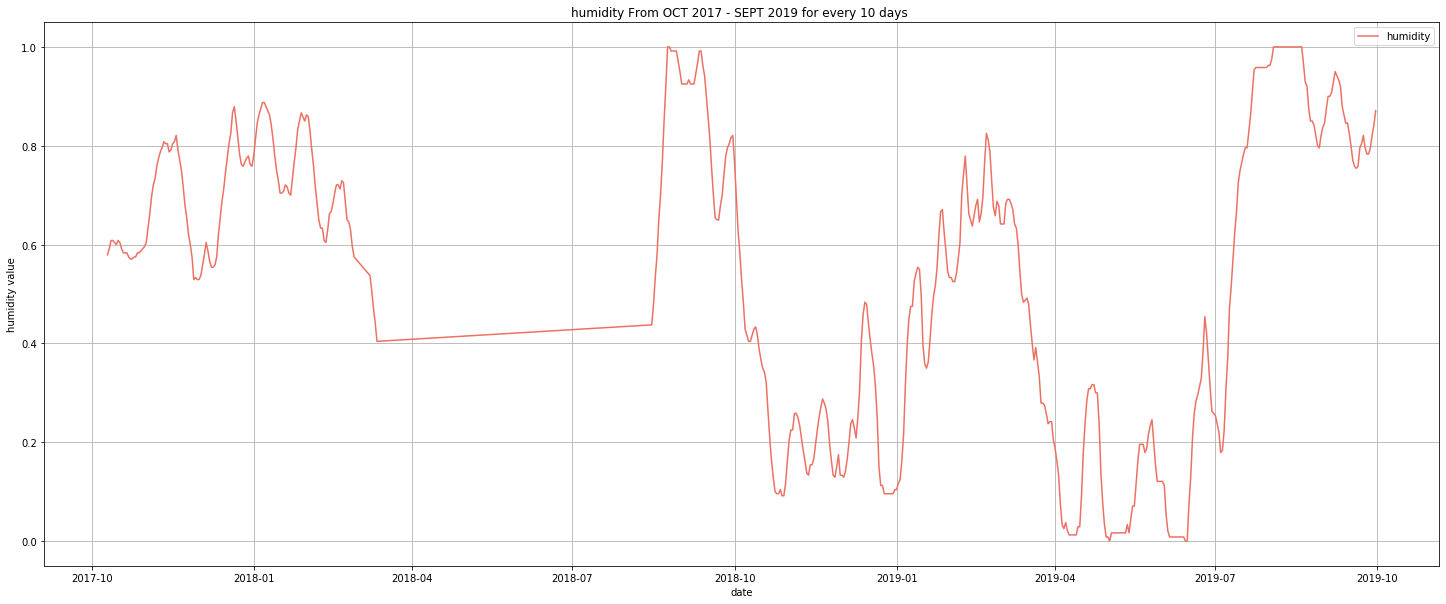

In [96]:
humidity =dataframe['humidity'].rolling(window=10).mean()
humidity.plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('humidity From OCT 2017 - SEPT 2019 for every 10 days ')
plt.ylabel('humidity value')

Text(0, 0.5, 'dew_point (celcius)')

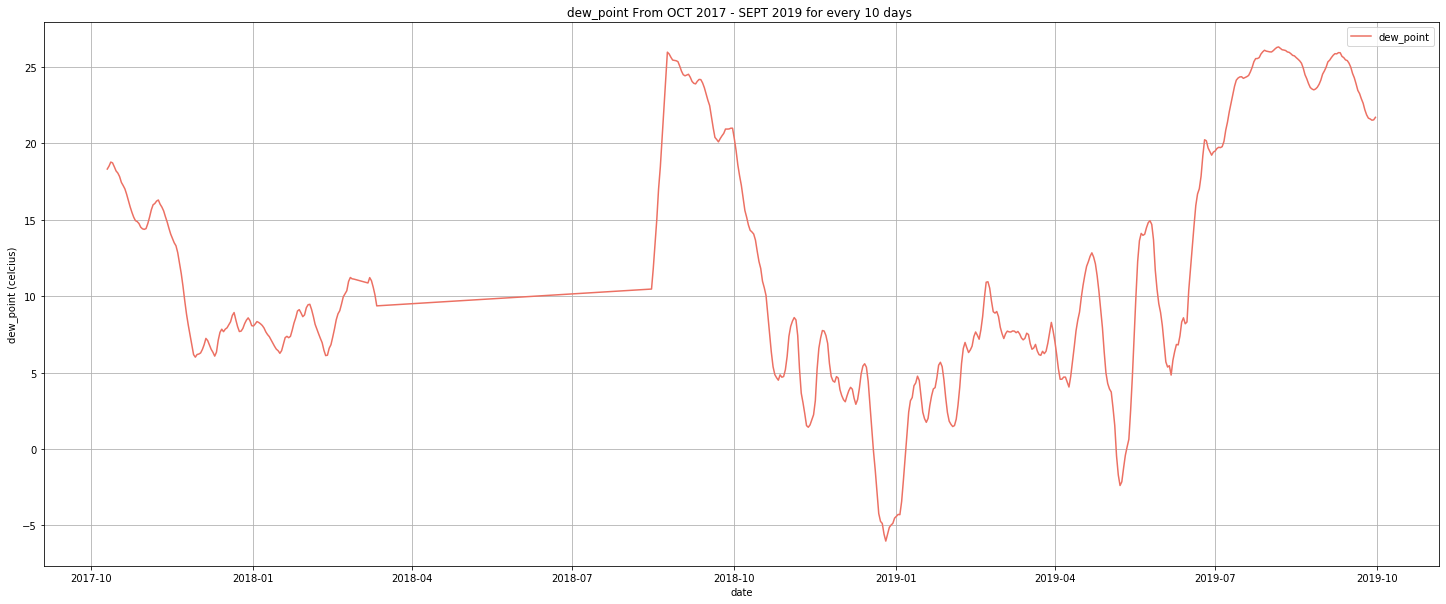

In [97]:
dew_point =dataframe['dew_point'].rolling(window=10).mean()
dew_point.plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('dew_point From OCT 2017 - SEPT 2019 for every 10 days ')
plt.ylabel('dew_point (celcius)')

Text(0, 0.5, 'wind_speed (Km/h)')

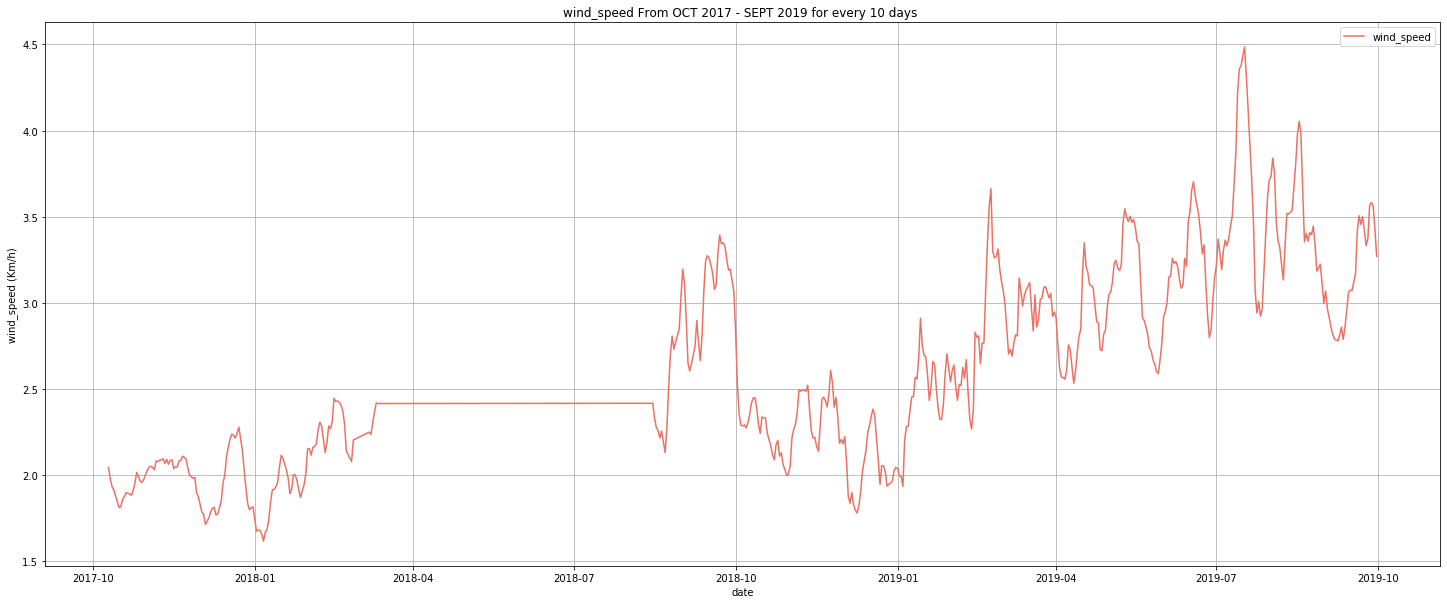

In [98]:
wind_speed =dataframe['wind_speed'].rolling(window=10).mean()
wind_speed.plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('wind_speed From OCT 2017 - SEPT 2019 for every 10 days ')
plt.ylabel('wind_speed (Km/h)')

Text(0, 0.5, 'wind_gust (m/s)')

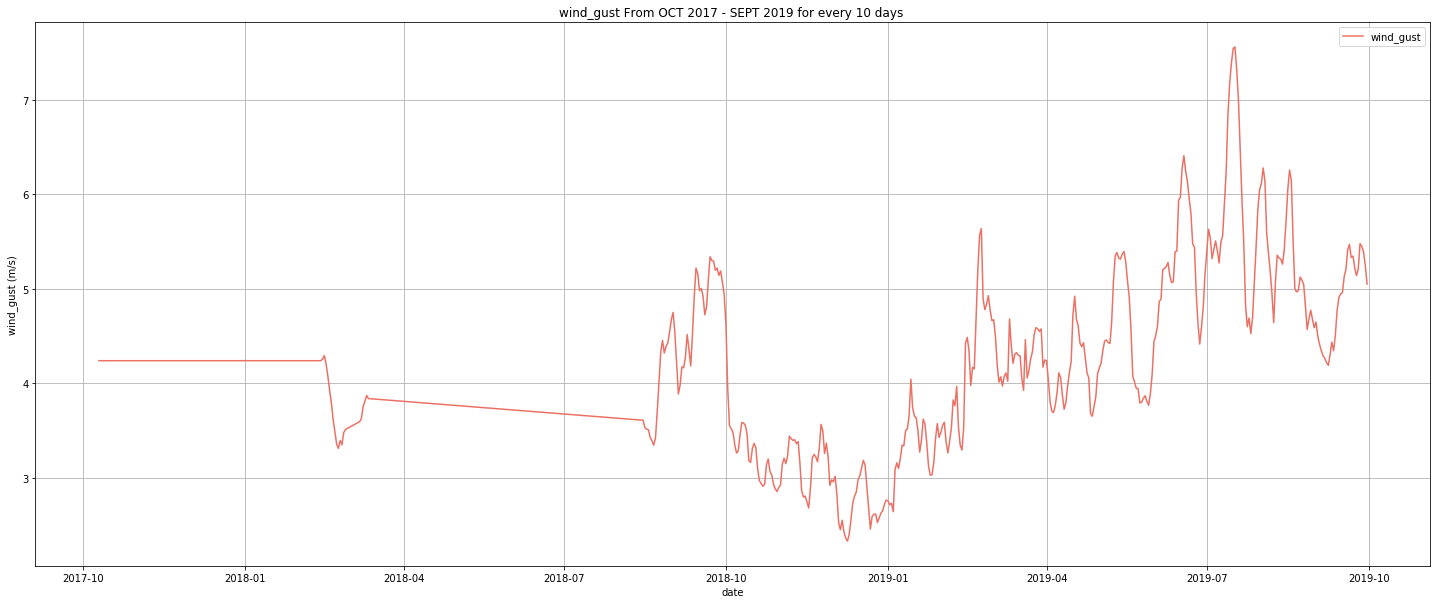

In [99]:
wind_gust =dataframe['wind_gust'].rolling(window=10).mean()
wind_gust.plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('wind_gust From OCT 2017 - SEPT 2019 for every 10 days ')
plt.ylabel('wind_gust (m/s)')

Text(0, 0.5, 'pressure (Hectapascal (hPa))')

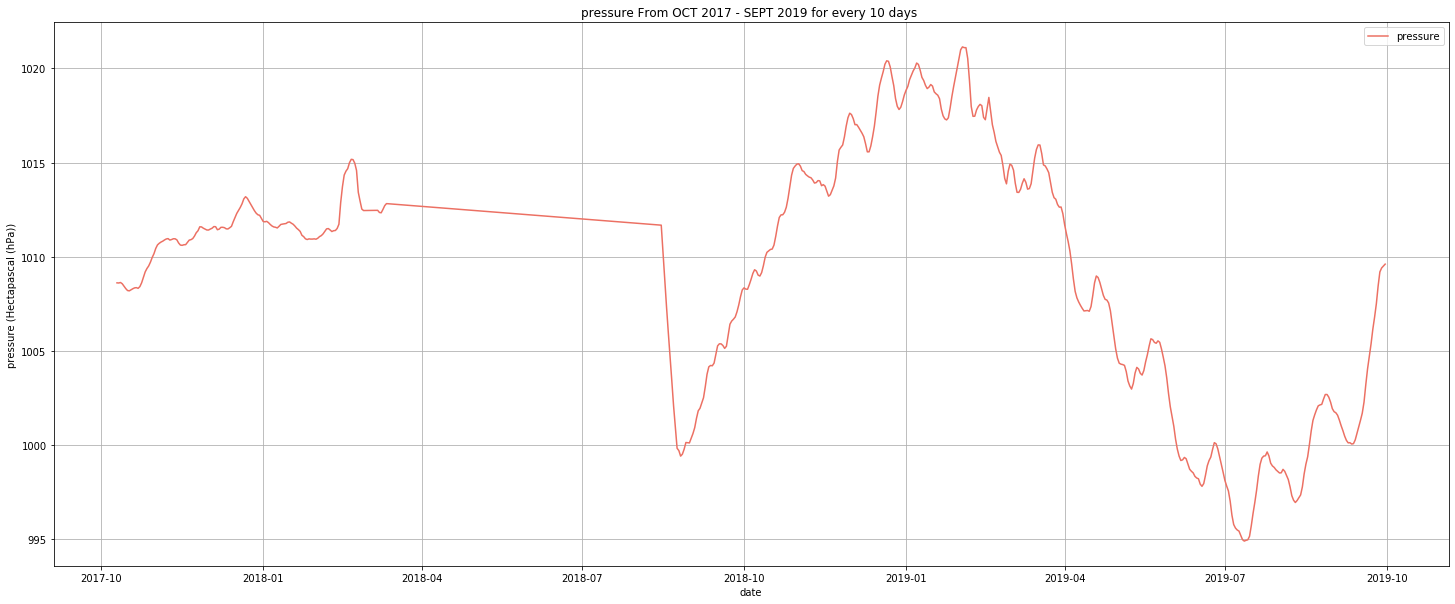

In [100]:

pressure =dataframe['pressure'].rolling(window=10).mean()
pressure.plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('pressure From OCT 2017 - SEPT 2019 for every 10 days ')
plt.ylabel('pressure (Hectapascal (hPa))')

Text(0, 0.5, 'uv_index ')

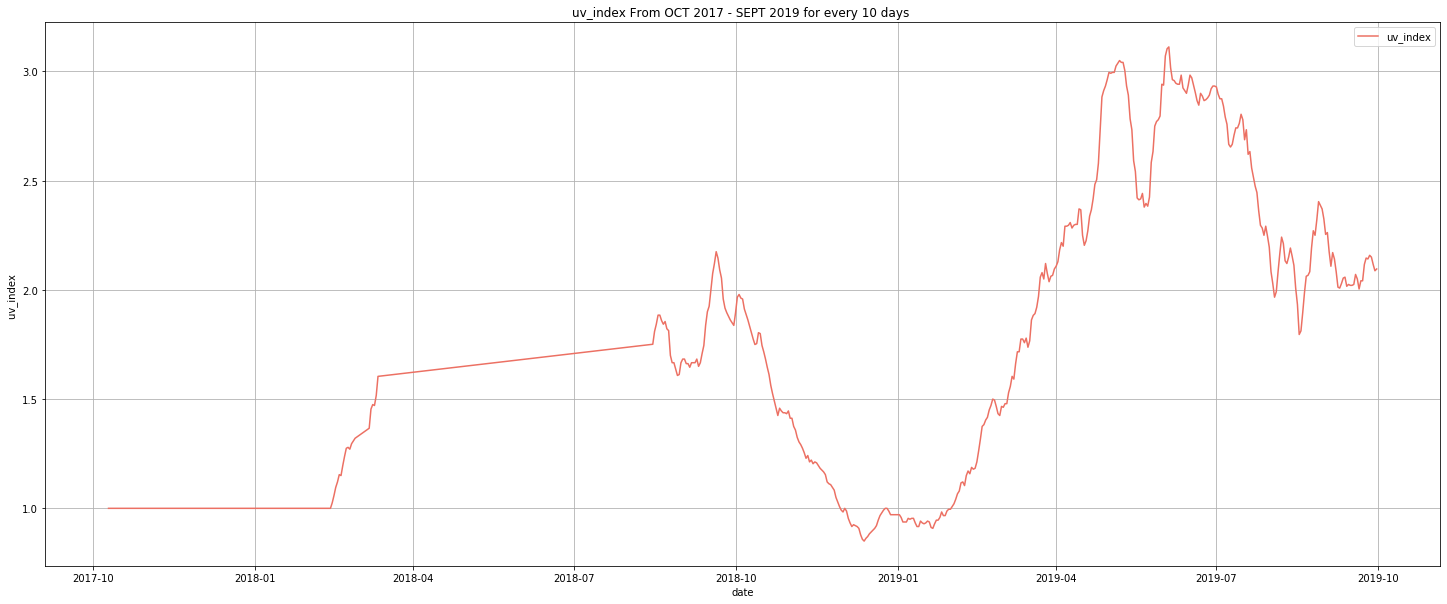

In [101]:
uv_index =dataframe['uv_index'].rolling(window=10).mean()
uv_index.plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('uv_index From OCT 2017 - SEPT 2019 for every 10 days ')
plt.ylabel('uv_index ')

Text(0, 0.5, 'ozone value ')

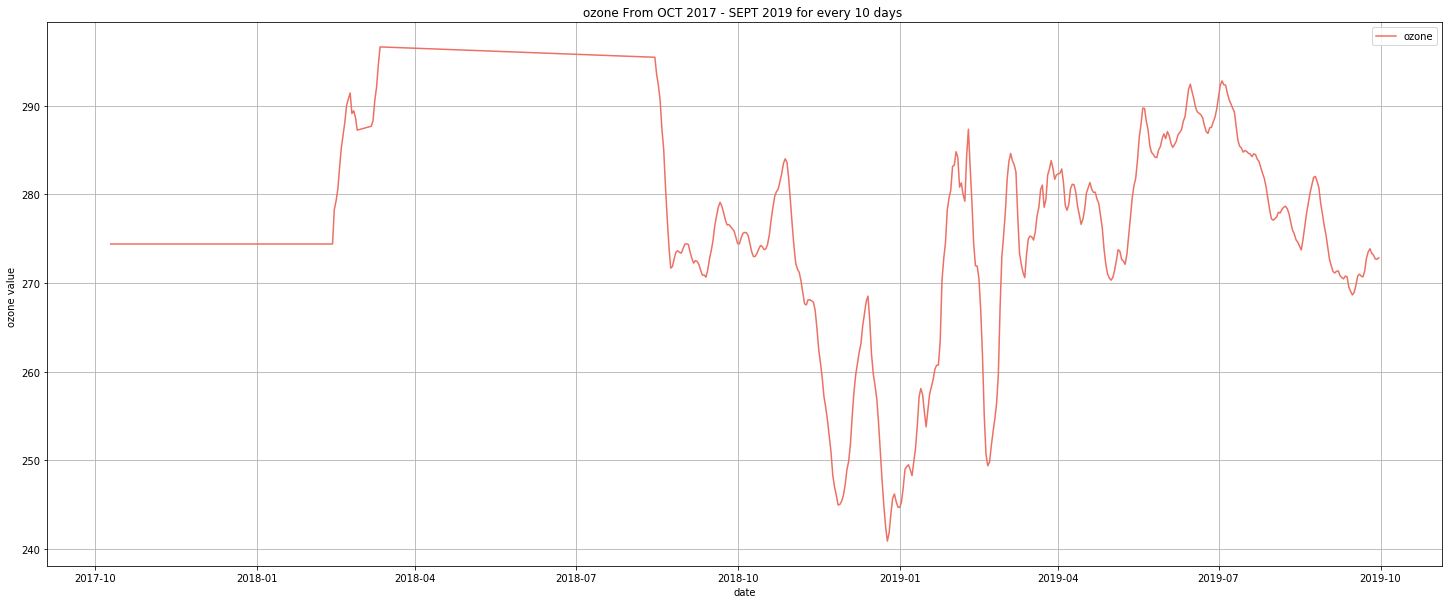

In [102]:
ozone =dataframe['ozone'].rolling(window=10).mean()
ozone.plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('ozone From OCT 2017 - SEPT 2019 for every 10 days ')
plt.ylabel('ozone value ')

Text(0, 0.5, 'precip_intensity (mm/h) ')

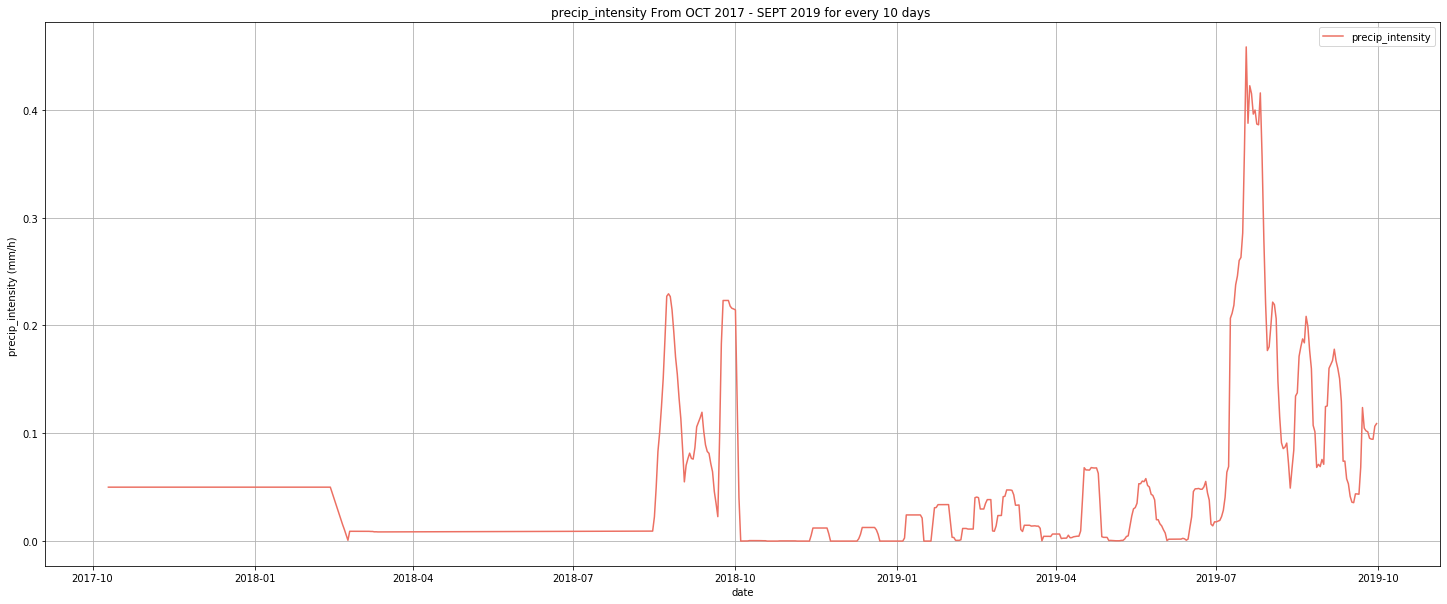

In [103]:
precip_intensity =dataframe['precip_intensity'].rolling(window=10).mean()
precip_intensity.plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('precip_intensity From OCT 2017 - SEPT 2019 for every 10 days ')
plt.ylabel('precip_intensity (mm/h) ')

Text(0, 0.5, 'precip_probability (%) ')

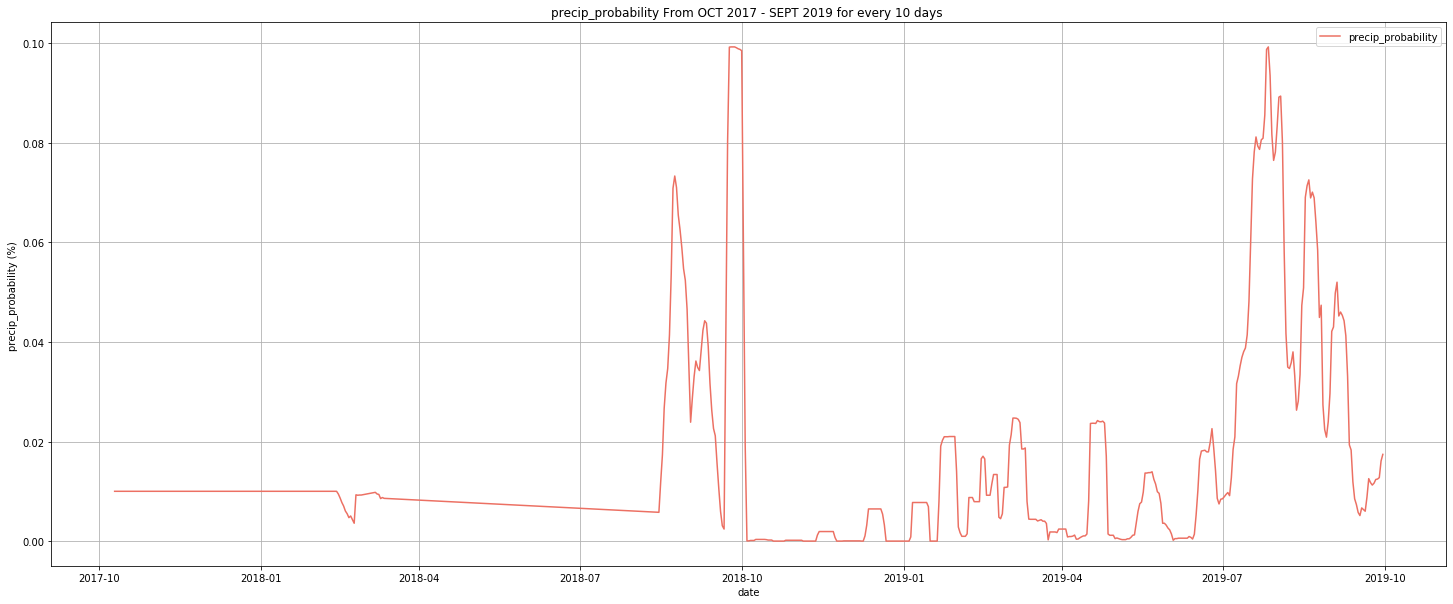

In [104]:
precip_probability =dataframe['precip_probability'].rolling(window=10).mean()
precip_probability.plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('precip_probability From OCT 2017 - SEPT 2019 for every 10 days ')
plt.ylabel('precip_probability (%) ')

Text(0, 0.5, 'visibility ')

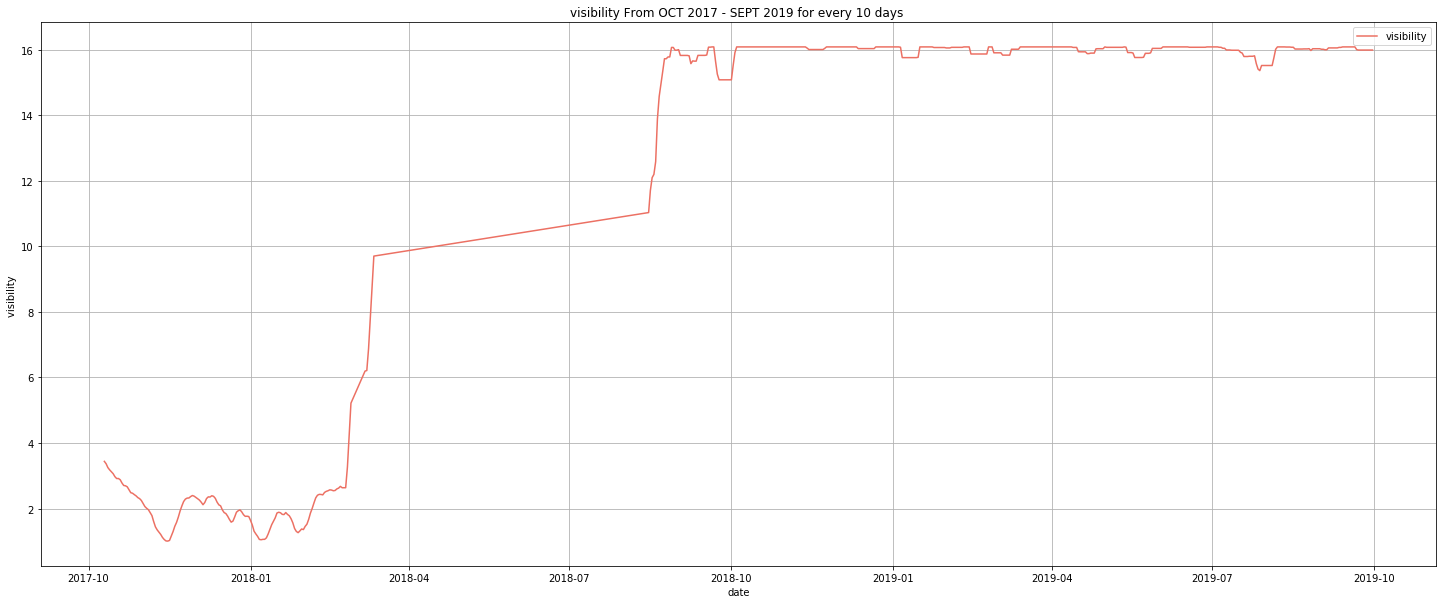

In [105]:
visibility =dataframe['visibility'].rolling(window=10).mean()
visibility.plot(grid=True, figsize=(25,10), legend=True,  color='#EC7063')
plt.title('visibility From OCT 2017 - SEPT 2019 for every 10 days ')
plt.ylabel('visibility ')

In [106]:
# Correlation with power
dataframe.corr()['power1']


cloud_cover            -0.200724
apparent_temperature    0.067289
temperature             0.137285
humidity               -0.324829
dew_point              -0.190482
wind_bearing            0.227552
wind_speed             -0.038051
wind_gust              -0.087954
pressure               -0.008485
uv_index                0.193933
ozone                   0.042034
precip_intensity       -0.282077
precip_probability     -0.317749
visibility              0.026447
icon                   -0.101447
summary                -0.048538
power1                  1.000000
precip_type_rain       -0.186608
Name: power1, dtype: float64

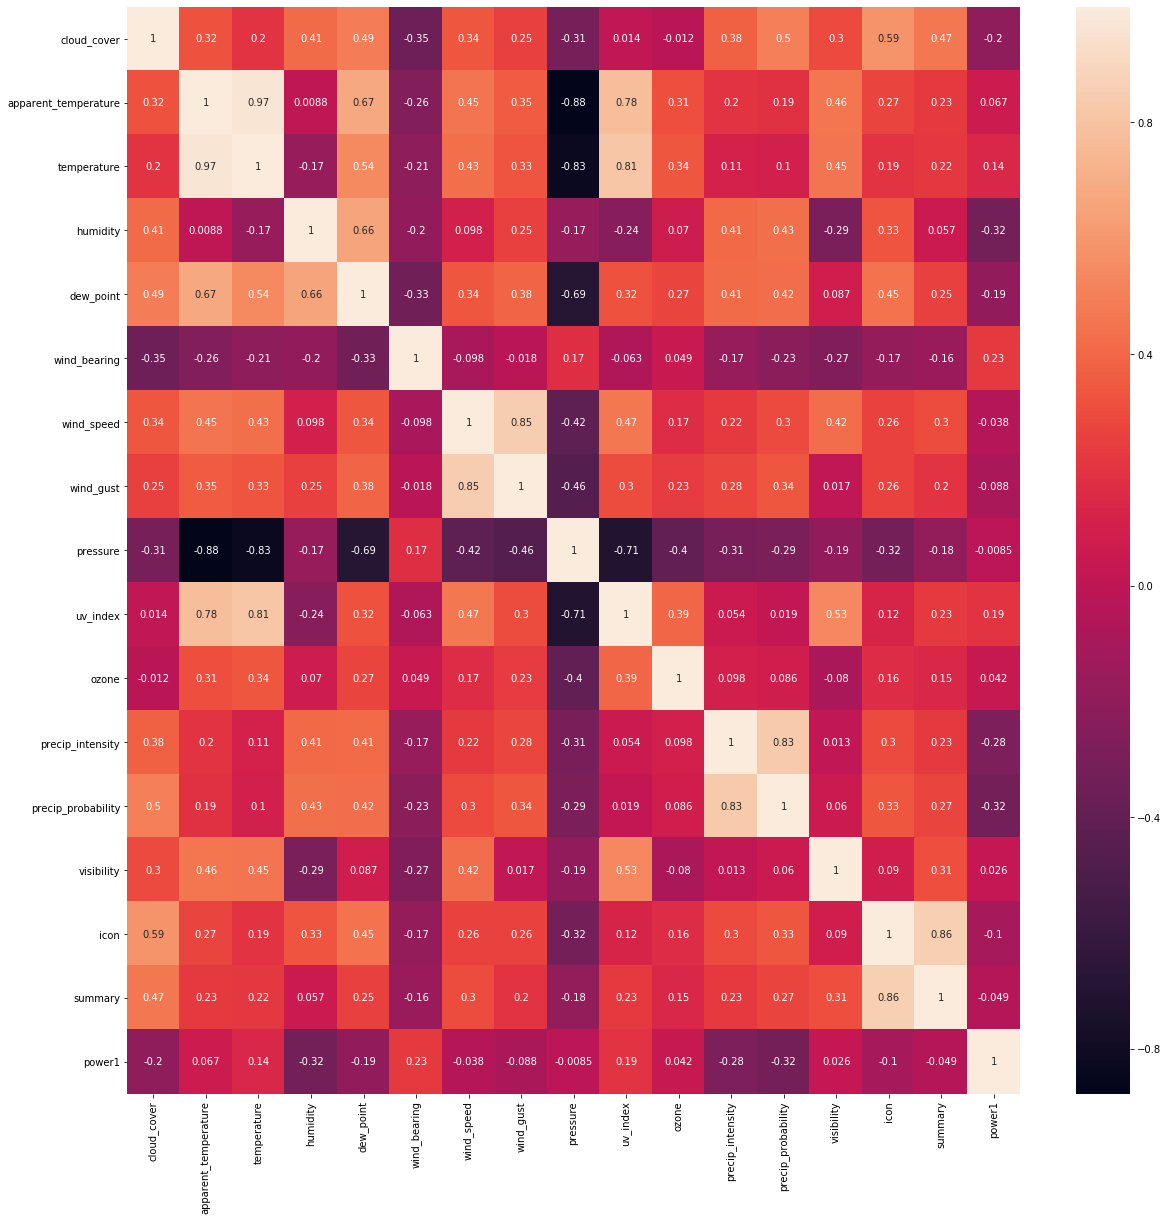

In [107]:
import seaborn as sns
corr=dataframe.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(dataframe[top_features].corr(),annot=True)

# Feature Selection

In [108]:
X=dataframe.drop(['power1'],axis=1)
y=dataframe['power1']

In [109]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(X,y)

In [110]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

visibility              0.259990
summary                 0.250079
pressure                0.235818
apparent_temperature    0.227561
precip_probability      0.217424
icon                    0.202359
uv_index                0.195499
precip_intensity        0.191638
humidity                0.191283
dew_point               0.184034
ozone                   0.179937
temperature             0.159044
wind_gust               0.154418
wind_speed              0.114191
cloud_cover             0.107055
wind_bearing            0.081883
precip_type_rain        0.068095
dtype: float64

In [111]:
threshold=0.8

In [112]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [113]:
correlation(X,threshold)

{'precip_probability',
 'pressure',
 'summary',
 'temperature',
 'uv_index',
 'wind_gust'}

 # ExtraTreesRegressor

In [114]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [115]:
print(model.feature_importances_)

[0.04666545 0.06254848 0.06210536 0.12996559 0.05092723 0.06466058
 0.05184646 0.05469078 0.06089719 0.09702547 0.08478593 0.03942931
 0.05421371 0.06262952 0.02573278 0.03373571 0.01814046]


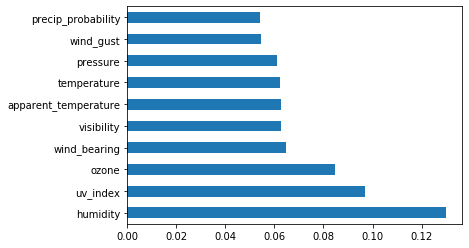

In [116]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [117]:
dataframe.columns

Index(['cloud_cover', 'apparent_temperature', 'temperature', 'humidity',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'visibility', 'icon', 'summary', 'power1', 'precip_type_rain'],
      dtype='object')

In [118]:
final_weather=pd.DataFrame(dataframe,columns=['humidity','uv_index', 'ozone','temperature','visibility', 'wind_bearing',  'pressure','apparent_temperature','wind_gust','precip_probability','power1'])

final_weather.head()

,humidity,uv_index,ozone,temperature,visibility,wind_bearing,pressure,apparent_temperature,wind_gust,precip_probability,power1
date,,,,,,,,,,,
2017-10-01,0.541667,1.0,274.4,29.375000,3.761667,244.500000,1008.482917,29.876667,4.24,0.01,330.84
2017-10-02,0.500000,1.0,274.4,29.291667,3.903750,261.250000,1008.091250,29.584167,4.24,0.01,330.84
2017-10-03,0.583333,1.0,274.4,28.958333,3.629583,277.916667,1008.445000,30.060833,4.24,0.01,330.84
2017-10-04,0.583333,1.0,274.4,29.333333,3.537083,275.125000,1008.931250,30.525417,4.24,0.01,330.84
2017-10-05,0.541667,1.0,274.4,30.208333,3.494167,238.125000,1008.997917,31.225833,4.24,0.01,330.84


# Weather Forecasted

In [119]:
wf=pd.read_csv("/Users/apple/Downloads/Assignment for Data Scientist/weather_forecast.csv")
wf.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,1,1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2,1,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,3,1,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,4,1,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


In [120]:
wf.shape

(648, 31)

In [121]:
wf.isnull().sum()

Unnamed: 0                0
plant_id                  0
datetime_utc              0
datetime_local            0
cloud_cover               0
apparent_temperature      0
temperature               0
humidity                  0
dew_point                 0
wind_bearing              0
wind_speed                0
wind_chill              648
wind_gust                 0
heat_index              648
pressure                  0
qpf                     648
uv_index                  0
snow                    648
pop                     648
fctcode                 648
ozone                     0
precip_accumulation     648
precip_intensity          0
precip_probability        0
precip_type             534
visibility                0
sunrise                   0
sunset                    0
icon                      0
summary                   0
updated_at                0
dtype: int64

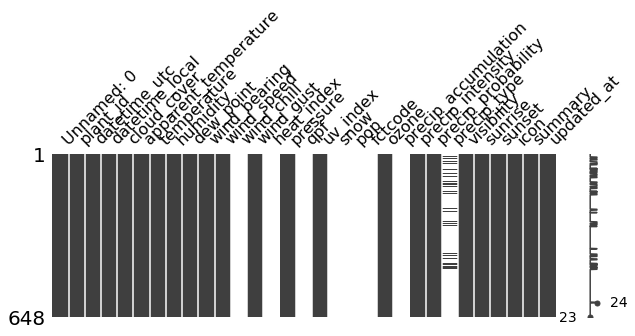

In [122]:
# Finding number of null values by Plot
missingno.matrix(wf, figsize = (10,3))

In [123]:
wf=wf.drop(["Unnamed: 0",'plant_id','wind_chill','heat_index','qpf','snow', 'pop', 'fctcode','precip_accumulation'],axis=1)
wf.head()

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,...,ozone,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,6.42,...,268.6,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,6.28,...,269.1,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,6.08,...,269.7,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,5.74,...,270.4,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,5.30,...,271.3,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


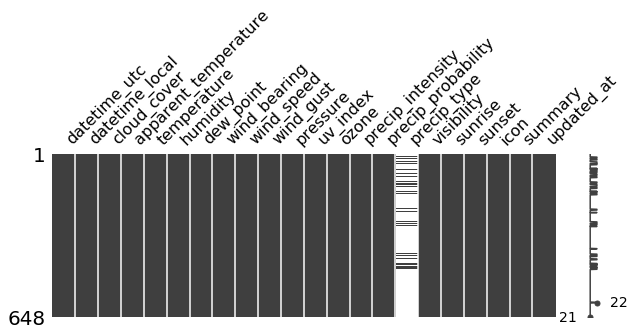

In [124]:
# Finding number of null values by Plot
missingno.matrix(wf, figsize = (10,3))

In [125]:
wf['precip_type'].unique()

array([nan, 'rain'], dtype=object)

In [126]:
wf['precip_type'] = wf['precip_type'].fillna('no rain')

In [127]:
wf.columns

Index(['datetime_utc', 'datetime_local', 'cloud_cover', 'apparent_temperature',
       'temperature', 'humidity', 'dew_point', 'wind_bearing', 'wind_speed',
       'wind_gust', 'pressure', 'uv_index', 'ozone', 'precip_intensity',
       'precip_probability', 'precip_type', 'visibility', 'sunrise', 'sunset',
       'icon', 'summary', 'updated_at'],
      dtype='object')

In [128]:
wf['datetime_utc'] = pd.to_datetime(wf.datetime_utc)
wf['datetime_local'] = pd.to_datetime(wf.datetime_local)
wf['sunrise'] = pd.to_datetime(wf.sunrise)
wf['sunset'] = pd.to_datetime(wf.sunset)
wf['updated_at'] = pd.to_datetime(wf.updated_at)


In [129]:
wf.head()

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,...,ozone,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,6.42,...,268.6,0.0,0.0,no rain,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,6.28,...,269.1,0.0,0.0,no rain,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,6.08,...,269.7,0.0,0.0,no rain,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,5.74,...,270.4,0.0,0.0,no rain,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,5.30,...,271.3,0.0,0.0,no rain,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


In [130]:
wf['date']=wf['datetime_utc'].dt.date

In [131]:
For_date=wf['date']
For_date

0      2019-09-30
1      2019-09-30
2      2019-09-30
3      2019-09-30
4      2019-09-30
          ...    
643    2019-10-27
644    2019-10-27
645    2019-10-27
646    2019-10-27
647    2019-10-27
Name: date, Length: 648, dtype: object

In [132]:
For_weather=wf.copy()

In [133]:
For_weather=For_weather.drop(["datetime_utc","sunrise","sunset","updated_at"],axis=1)
For_weather.head()

,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,precip_type,visibility,icon,summary,date
0,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,6.42,1008.45,0,268.6,0.0,0.0,no rain,16.09,partly-cloudy-night,Partly Cloudy,2019-09-30
1,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,6.28,1008.24,0,269.1,0.0,0.0,no rain,16.09,partly-cloudy-night,Partly Cloudy,2019-09-30
2,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,6.08,1007.90,0,269.7,0.0,0.0,no rain,16.09,partly-cloudy-night,Partly Cloudy,2019-09-30
3,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,5.74,1007.61,0,270.4,0.0,0.0,no rain,16.09,partly-cloudy-night,Partly Cloudy,2019-09-30
4,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,5.30,1007.51,0,271.3,0.0,0.0,no rain,16.09,partly-cloudy-night,Partly Cloudy,2019-09-30


In [134]:
For_weather_df = For_weather.groupby(['date'])['cloud_cover', 'apparent_temperature', 'temperature',
       'humidity', 'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust',
       'pressure', 'uv_index', 'ozone', 'precip_intensity',
       'precip_probability', 'visibility'].mean().reset_index()
For_weather_df.head()

,date,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility
0,2019-09-30,0.455000,25.101667,24.333333,1.000000,21.848333,102.000000,2.658333,5.715000,1007.956667,0.000,270.116667,0.000000,0.000000,16.09
1,2019-10-01,0.365417,29.722500,28.041667,0.833333,20.895000,71.416667,2.597500,4.165000,1008.726250,1.500,273.829167,0.020417,0.003333,16.09
2,2019-10-02,0.207083,29.752917,28.208333,0.791667,20.344583,74.458333,1.823750,3.805417,1009.637917,1.875,275.191667,0.009583,0.004167,16.09
3,2019-10-03,0.329167,29.861667,28.625000,0.750000,19.293750,158.625000,2.291250,4.400833,1009.640833,1.500,273.895833,0.042083,0.012083,16.09
4,2019-10-04,0.289583,28.290417,27.625000,0.708333,18.437500,42.500000,2.258333,2.683750,1010.439167,1.375,276.108333,0.025000,0.010000,16.09


In [135]:
forecast_date=For_weather_df.iloc[:,0:1]
forecast_date.head()

,date
0,2019-09-30
1,2019-10-01
2,2019-10-02
3,2019-10-03
4,2019-10-04


In [136]:
For_weather_df.set_index('date',inplace=True)
For_weather_df.head()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility
date,,,,,,,,,,,,,,
2019-09-30,0.455000,25.101667,24.333333,1.000000,21.848333,102.000000,2.658333,5.715000,1007.956667,0.000,270.116667,0.000000,0.000000,16.09
2019-10-01,0.365417,29.722500,28.041667,0.833333,20.895000,71.416667,2.597500,4.165000,1008.726250,1.500,273.829167,0.020417,0.003333,16.09
2019-10-02,0.207083,29.752917,28.208333,0.791667,20.344583,74.458333,1.823750,3.805417,1009.637917,1.875,275.191667,0.009583,0.004167,16.09
2019-10-03,0.329167,29.861667,28.625000,0.750000,19.293750,158.625000,2.291250,4.400833,1009.640833,1.500,273.895833,0.042083,0.012083,16.09
2019-10-04,0.289583,28.290417,27.625000,0.708333,18.437500,42.500000,2.258333,2.683750,1010.439167,1.375,276.108333,0.025000,0.010000,16.09


In [137]:
For_weather_df1 = For_weather.groupby(['date'])[['precip_type', 'icon', 'summary']].max()

In [138]:
Forecast_weather=For_weather_df.join(For_weather_df1)
Forecast_weather.head()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,precip_type,icon,summary
date,,,,,,,,,,,,,,,,,
2019-09-30,0.455000,25.101667,24.333333,1.000000,21.848333,102.000000,2.658333,5.715000,1007.956667,0.000,270.116667,0.000000,0.000000,16.09,no rain,partly-cloudy-night,Partly Cloudy
2019-10-01,0.365417,29.722500,28.041667,0.833333,20.895000,71.416667,2.597500,4.165000,1008.726250,1.500,273.829167,0.020417,0.003333,16.09,rain,partly-cloudy-night,Partly Cloudy
2019-10-02,0.207083,29.752917,28.208333,0.791667,20.344583,74.458333,1.823750,3.805417,1009.637917,1.875,275.191667,0.009583,0.004167,16.09,rain,partly-cloudy-night,Partly Cloudy
2019-10-03,0.329167,29.861667,28.625000,0.750000,19.293750,158.625000,2.291250,4.400833,1009.640833,1.500,273.895833,0.042083,0.012083,16.09,rain,partly-cloudy-night,Partly Cloudy
2019-10-04,0.289583,28.290417,27.625000,0.708333,18.437500,42.500000,2.258333,2.683750,1010.439167,1.375,276.108333,0.025000,0.010000,16.09,rain,partly-cloudy-night,Partly Cloudy


In [139]:
Forecast_weather['icon']=labelencoder.fit_transform(Forecast_weather['icon'])
Forecast_weather['summary']=labelencoder.fit_transform(Forecast_weather['summary'])

In [140]:
Forecast_weather=pd.get_dummies(Forecast_weather,columns=["precip_type"],drop_first=True)
Forecast_weather.head()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,icon,summary,precip_type_rain
date,,,,,,,,,,,,,,,,,
2019-09-30,0.455000,25.101667,24.333333,1.000000,21.848333,102.000000,2.658333,5.715000,1007.956667,0.000,270.116667,0.000000,0.000000,16.09,1,2,0
2019-10-01,0.365417,29.722500,28.041667,0.833333,20.895000,71.416667,2.597500,4.165000,1008.726250,1.500,273.829167,0.020417,0.003333,16.09,1,2,1
2019-10-02,0.207083,29.752917,28.208333,0.791667,20.344583,74.458333,1.823750,3.805417,1009.637917,1.875,275.191667,0.009583,0.004167,16.09,1,2,1
2019-10-03,0.329167,29.861667,28.625000,0.750000,19.293750,158.625000,2.291250,4.400833,1009.640833,1.500,273.895833,0.042083,0.012083,16.09,1,2,1
2019-10-04,0.289583,28.290417,27.625000,0.708333,18.437500,42.500000,2.258333,2.683750,1010.439167,1.375,276.108333,0.025000,0.010000,16.09,1,2,1


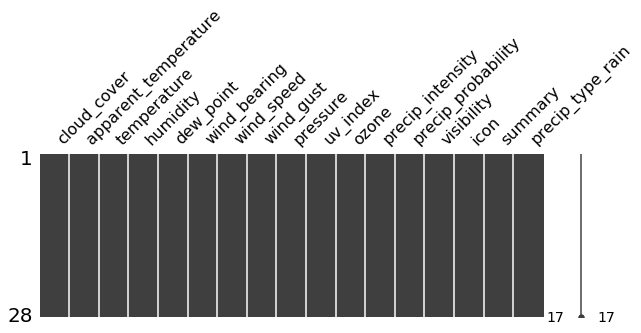

In [141]:
# Finding number of null values by Plot
missingno.matrix(Forecast_weather, figsize = (10,3))

# Pairplot

In [142]:
# Pairplot
sns.pairplot(Forecast_weather)

In [143]:
ff_weather=pd.DataFrame(Forecast_weather,columns=['humidity','uv_index', 'ozone','temperature','visibility', 'wind_bearing',  'pressure','apparent_temperature','wind_gust','precip_probability'])

ff_weather.head()

,humidity,uv_index,ozone,temperature,visibility,wind_bearing,pressure,apparent_temperature,wind_gust,precip_probability
date,,,,,,,,,,
2019-09-30,1.000000,0.000,270.116667,24.333333,16.09,102.000000,1007.956667,25.101667,5.715000,0.000000
2019-10-01,0.833333,1.500,273.829167,28.041667,16.09,71.416667,1008.726250,29.722500,4.165000,0.003333
2019-10-02,0.791667,1.875,275.191667,28.208333,16.09,74.458333,1009.637917,29.752917,3.805417,0.004167
2019-10-03,0.750000,1.500,273.895833,28.625000,16.09,158.625000,1009.640833,29.861667,4.400833,0.012083
2019-10-04,0.708333,1.375,276.108333,27.625000,16.09,42.500000,1010.439167,28.290417,2.683750,0.010000


In [145]:
ff_weather.shape

(28, 10)

# Spliting Data 

In [146]:
x_train=final_weather.iloc[:,:-1]
y_train=final_weather.iloc[:,-1:]

In [147]:
x_train.head()

,humidity,uv_index,ozone,temperature,visibility,wind_bearing,pressure,apparent_temperature,wind_gust,precip_probability
date,,,,,,,,,,
2017-10-01,0.541667,1.0,274.4,29.375000,3.761667,244.500000,1008.482917,29.876667,4.24,0.01
2017-10-02,0.500000,1.0,274.4,29.291667,3.903750,261.250000,1008.091250,29.584167,4.24,0.01
2017-10-03,0.583333,1.0,274.4,28.958333,3.629583,277.916667,1008.445000,30.060833,4.24,0.01
2017-10-04,0.583333,1.0,274.4,29.333333,3.537083,275.125000,1008.931250,30.525417,4.24,0.01
2017-10-05,0.541667,1.0,274.4,30.208333,3.494167,238.125000,1008.997917,31.225833,4.24,0.01


In [148]:
y_train.head()

,power1
date,
2017-10-01,330.84
2017-10-02,330.84
2017-10-03,330.84
2017-10-04,330.84
2017-10-05,330.84


# Feature Preprocessing

In [149]:
from sklearn import preprocessing


In [170]:
n_x_train=preprocessing.normalize(x_train)
n_x_train

array([[5.04251949e-04, 9.30926675e-04, 2.55446280e-01, ...,
        2.78129860e-02, 3.94712910e-03, 9.30926675e-06],
       [4.63925984e-04, 9.27851968e-04, 2.54602580e-01, ...,
        2.74497273e-02, 3.93409234e-03, 9.27851968e-06],
       [5.38999614e-04, 9.23999338e-04, 2.53545418e-01, ...,
        2.77761901e-02, 3.91775719e-03, 9.23999338e-06],
       ...,
       [9.50740522e-04, 1.82225267e-03, 2.61707174e-01, ...,
        2.90819642e-02, 4.74261064e-03, 1.82225267e-05],
       [9.52243073e-04, 1.94416294e-03, 2.59410851e-01, ...,
        2.69956943e-02, 4.67194258e-03, 3.53123473e-05],
       [9.50944613e-04, 1.94151192e-03, 2.57424669e-01, ...,
        2.74886390e-02, 3.14683422e-03, 1.38679423e-05]])

In [176]:
n_ff_weather=preprocessing.normalize(ff_weather)
n_ff_weather

array([[9.53090779e-04, 0.00000000e+00, 2.57445704e-01, 2.31918756e-02,
        1.53352306e-02, 9.72152594e-02, 9.60674205e-01, 2.39241670e-02,
        5.44691380e-03, 0.00000000e+00],
       [7.94710992e-04, 1.43047979e-03, 2.61138058e-01, 2.67420249e-02,
        1.53442798e-02, 6.81067320e-02, 9.61975007e-01, 2.83449570e-02,
        3.97196554e-03, 3.17884397e-06],
       [7.53933489e-04, 1.78563195e-03, 2.62075217e-01, 2.68638406e-02,
        1.53231030e-02, 7.09094287e-02, 9.61515584e-01, 2.83348046e-02,
        3.62403924e-03, 3.96807100e-06],
       [7.08194267e-04, 1.41638853e-03, 2.58628612e-01, 2.70294145e-02,
        1.51931277e-02, 1.49783087e-01, 9.53362466e-01, 2.81971482e-02,
        4.15552658e-03, 1.14097965e-05],
       [6.75105069e-04, 1.31049808e-03, 2.63155956e-01, 2.63290977e-02,
        1.53352102e-02, 4.05063041e-02, 9.63038969e-01, 2.69632993e-02,
        2.55785397e-03, 9.53089509e-06],
       [5.85514419e-04, 1.36620031e-03, 2.61861565e-01, 2.57626344e-02,
   

In [171]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
lr_pca=pca.fit(n_x_train)
lr_pca

PCA(n_components=3)

# Linear Regression Model

In [174]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(n_x_train,y_train)

LinearRegression()

In [178]:
y_pred_lr=regression.predict(n_ff_weather)
y_pred_lr

array([[205.30839371],
       [263.86680601],
       [279.76785982],
       [283.09225113],
       [264.03850169],
       [306.97734946],
       [309.2381151 ],
       [335.91808586],
       [336.03830664],
       [306.64810753],
       [304.55643161],
       [301.13532406],
       [315.29535238],
       [320.93654501],
       [301.03717746],
       [317.09021626],
       [303.87986562],
       [303.00080294],
       [275.45804917],
       [278.23936224],
       [331.30435074],
       [330.00812585],
       [332.23037756],
       [326.88982486],
       [287.25756911],
       [283.15385739],
       [287.6948395 ],
       [361.06054223]])

In [179]:

score_lr=regression.score(n_ff_weather,y_pred_lr)
score_lr

1.0

In [188]:
#from sklearn.metrics import mean_squared_error
#mean_squared_error(y_train,y_pred_lr)

In [182]:
lr_Power=pd.DataFrame(y_pred_lr,columns=['LRF_Power'])
lr_Power.head()

,LRF_Power
0,205.308394
1,263.866806
2,279.767860
3,283.092251
4,264.038502


In [183]:
# joining forecast_date and lr_Power Datasets
lr_fp=forecast_date.join(lr_Power)
lr_fp.head()

,date,LRF_Power
0,2019-09-30,205.308394
1,2019-10-01,263.866806
2,2019-10-02,279.767860
3,2019-10-03,283.092251
4,2019-10-04,264.038502


In [295]:
lr_fp.to_csv('Linear_Regression_Result.csv')

In [184]:
lr_fp.set_index('date',inplace=True)
lr_fp.head()

,LRF_Power
date,
2019-09-30,205.308394
2019-10-01,263.866806
2019-10-02,279.767860
2019-10-03,283.092251
2019-10-04,264.038502


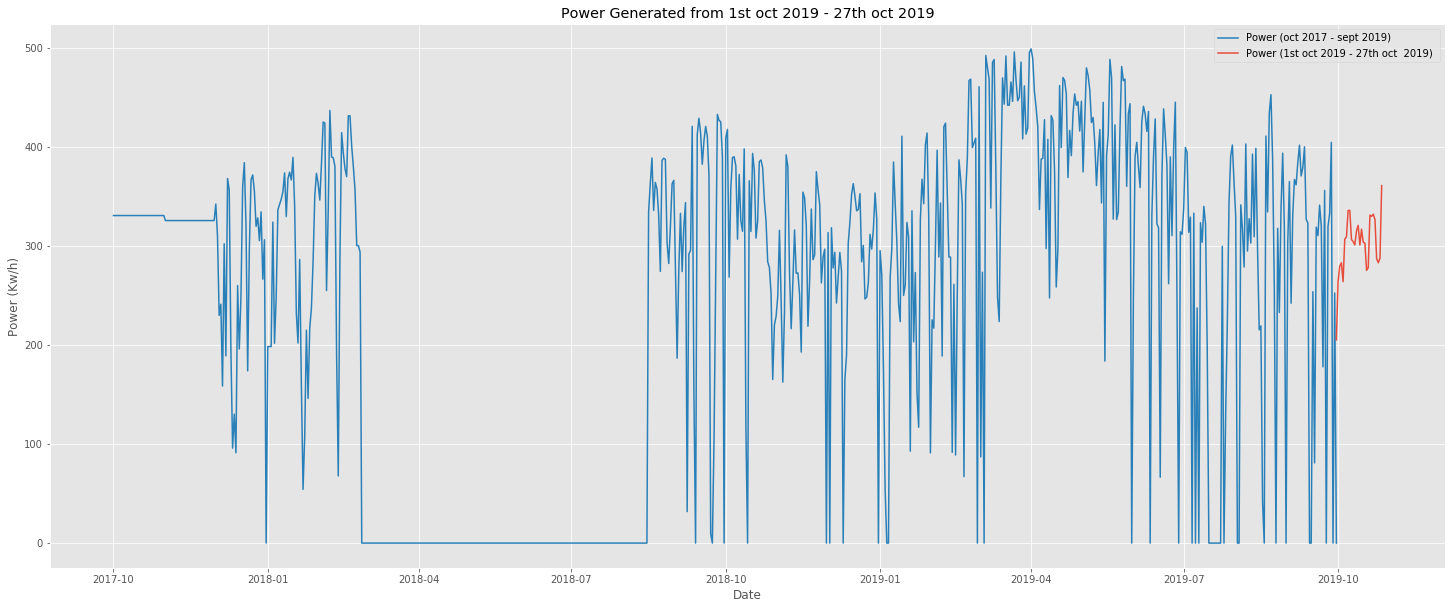

In [185]:
# Power Generated from 1st oct 2019 - 27th oct 2019
final_weather['power1'].plot(grid=True, figsize=(25,10), label='Power (oct 2017 - sept 2019)',  color='#2980B9')
lr_fp['LRF_Power'].plot(grid=True, figsize=(25,10), label='Forecasted Power (1st oct 2019 - 27th oct  2019) ',  color='#E74C3C')
plt.title('Forecasted Linear Regression Power Generated from 1st oct 2019 - 27th oct 2019')
plt.xlabel("Date")
plt.ylabel("Power (Kw/h)")
plt.legend()

# Random Forest

In [197]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [208]:
# Create a pipeline
pipe = Pipeline([("regressor", RandomForestRegressor())])
#  hyperparameters
grid_param = [
                {"regressor": [RandomForestRegressor()],
                 "regressor__n_estimators": [10, 100, 1000],
                 "regressor__max_depth":[5,8,15,25,30,None],
                 "regressor__min_samples_leaf":[1,2,5,10,15,100],
                 "regressor__max_leaf_nodes": [2, 5,10]}]

RF_model = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
RF_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [RandomForestRegressor(max_depth=8,
                                                              max_leaf_nodes=10,
                                                              min_samples_leaf=5,
                                                              n_estimators=10)],
                          'regressor__max_depth': [5, 8, 15, 25, 30, None],
                          'regressor__max_leaf_nodes': [2, 5, 10],
                          'regressor__min_samples_leaf': [1, 2, 5, 10, 15, 100],
                          'regressor__n_estimators': [10, 100, 1000]}])

In [209]:
print(RF_model.best_estimator_)


Pipeline(steps=[('regressor',
                 RandomForestRegressor(max_depth=8, max_leaf_nodes=10,
                                       min_samples_leaf=5, n_estimators=10))])


In [215]:
y_pred_RF=RF_model.predict(ff_weather)
y_pred_RF

array([217.92077141, 245.01691477, 307.25310979, 300.43754221,
       264.57876455, 287.45500388, 314.07638155, 321.06576052,
       337.37158857, 325.51120054, 337.37158857, 308.69494271,
       327.15841112, 327.15841112, 291.48288856, 327.15841112,
       308.69494271, 327.15841112, 280.72174768, 280.72174768,
       321.06576052, 321.06576052, 321.06576052, 297.09709317,
       291.48288856, 291.48288856, 277.08552807, 344.95824654])

In [216]:
score_RF=RF_model.score(ff_weather,y_pred_RF)
score_RF

1.0

In [218]:
RF_FPower=pd.DataFrame(y_pred_RF,columns=['RFF_Power'])
RF_FPower.head()

,RFF_Power
0,217.920771
1,245.016915
2,307.253110
3,300.437542
4,264.578765


In [219]:
# joining forecast_date and RF_FPower Datasets
RF_fp=forecast_date.join(RF_FPower)
RF_fp.head()

,date,RFF_Power
0,2019-09-30,217.920771
1,2019-10-01,245.016915
2,2019-10-02,307.253110
3,2019-10-03,300.437542
4,2019-10-04,264.578765


In [296]:
RF_fp.to_csv('RandomForest_Result.csv')

In [220]:
RF_fp.set_index('date',inplace=True)
RF_fp.head()

,RFF_Power
date,
2019-09-30,217.920771
2019-10-01,245.016915
2019-10-02,307.253110
2019-10-03,300.437542
2019-10-04,264.578765


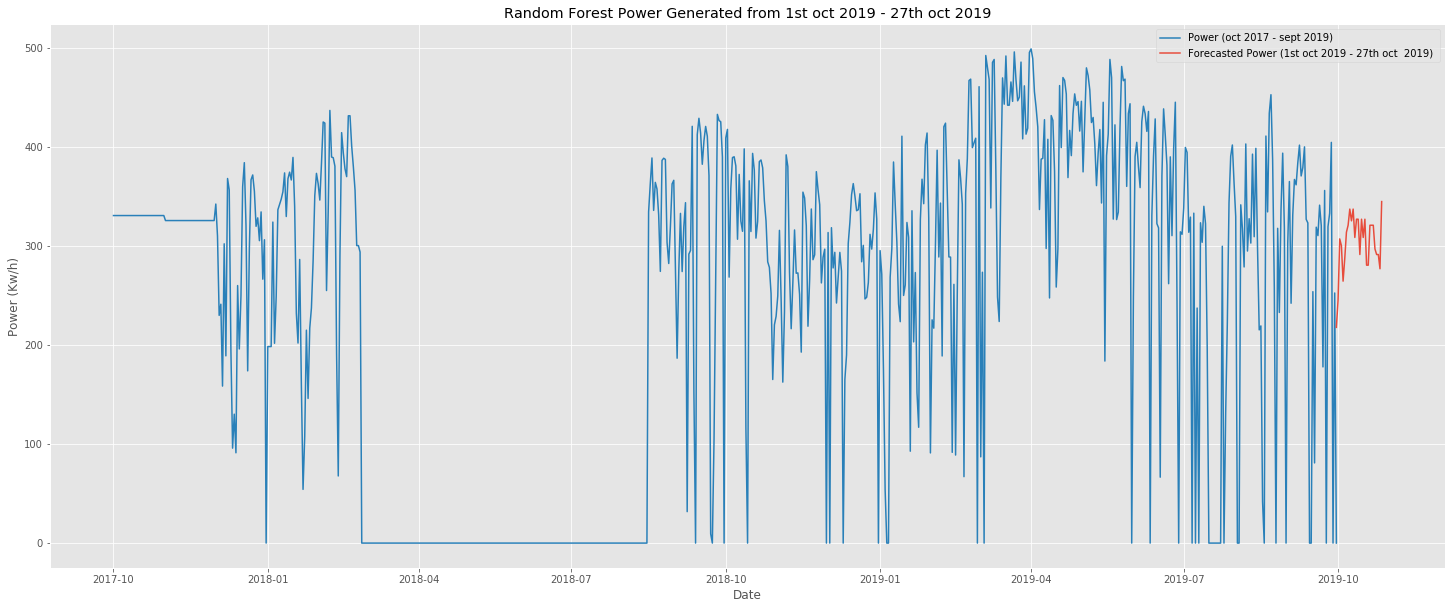

In [221]:
# Power Generated from 1st oct 2019 - 27th oct 2019
final_weather['power1'].plot(grid=True, figsize=(25,10), label='Power (oct 2017 - sept 2019)',  color='#2980B9')
RF_fp['RFF_Power'].plot(grid=True, figsize=(25,10), label='Forecasted Power (1st oct 2019 - 27th oct  2019) ',  color='#E74C3C')
plt.title('Random Forest Power Generated from 1st oct 2019 - 27th oct 2019')
plt.xlabel("Date")
plt.ylabel("Power (Kw/h)")
plt.legend()

# XGBoost Model

In [222]:
import xgboost as xgb

In [224]:
# Create a pipeline
pipe = Pipeline([("regressor", xgb.XGBRegressor())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"regressor": [xgb.XGBRegressor()],
                 "regressor__n_estimators": [10, 50, 100],
                 "regressor__max_depth":[5,8,15,25,30,None],
                 "regressor__learning_rate":[0,0.1,0.2,0.3,0.5,0.8,1],
                 }]
# create a gridsearch of the pipeline, the fit the best model
XGB_model = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
XGB_model.fit(x_train,y_train)

[11:22:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=Pipeline(steps=[('regressor', XGBRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [XGBRegressor(max_depth=5,
                                                     n_estimators=50)],
                          'regressor__learning_rate': [0, 0.1, 0.2, 0.3, 0.5,
                                                       0.8, 1],
                          'regressor__max_depth': [5, 8, 15, 25, 30, None],
                          'regressor__n_estimators': [10, 50, 100]}])

In [225]:
print(XGB_model.best_estimator_)

Pipeline(steps=[('regressor', XGBRegressor(max_depth=5, n_estimators=50))])


In [226]:
y_pred_XGB=XGB_model.predict(ff_weather)
y_pred_XGB

array([203.88673, 296.22232, 286.25244, 303.58987, 299.50827, 336.41064,
       318.38052, 247.90385, 366.786  , 334.12006, 320.39725, 323.7235 ,
       300.10825, 313.37888, 307.3441 , 304.29028, 315.4829 , 304.64307,
       297.02545, 283.2908 , 360.77533, 349.23227, 353.0287 , 297.56607,
       315.1613 , 312.90512, 290.01047, 394.99414], dtype=float32)

In [227]:
score_XGB=XGB_model.score(ff_weather,y_pred_XGB)
score_XGB

1.0

In [234]:
#rmse = np.sqrt(mean_squared_error(y_train,y_pred_XGB))

In [228]:
XGB_FPower=pd.DataFrame(y_pred_XGB,columns=['XGB_Power'])
XGB_FPower.head()

,XGB_Power
0,203.886734
1,296.222321
2,286.252441
3,303.589874
4,299.508270


In [229]:
# joining forecast_date and XGB_FPower Datasets
XGB_fp=forecast_date.join(XGB_FPower)
XGB_fp.head()

,date,XGB_Power
0,2019-09-30,203.886734
1,2019-10-01,296.222321
2,2019-10-02,286.252441
3,2019-10-03,303.589874
4,2019-10-04,299.508270


In [298]:
XGB_fp.to_csv('XGBoost1_Result.csv')

In [230]:

XGB_fp.set_index('date',inplace=True)
XGB_fp.head()

,XGB_Power
date,
2019-09-30,203.886734
2019-10-01,296.222321
2019-10-02,286.252441
2019-10-03,303.589874
2019-10-04,299.508270


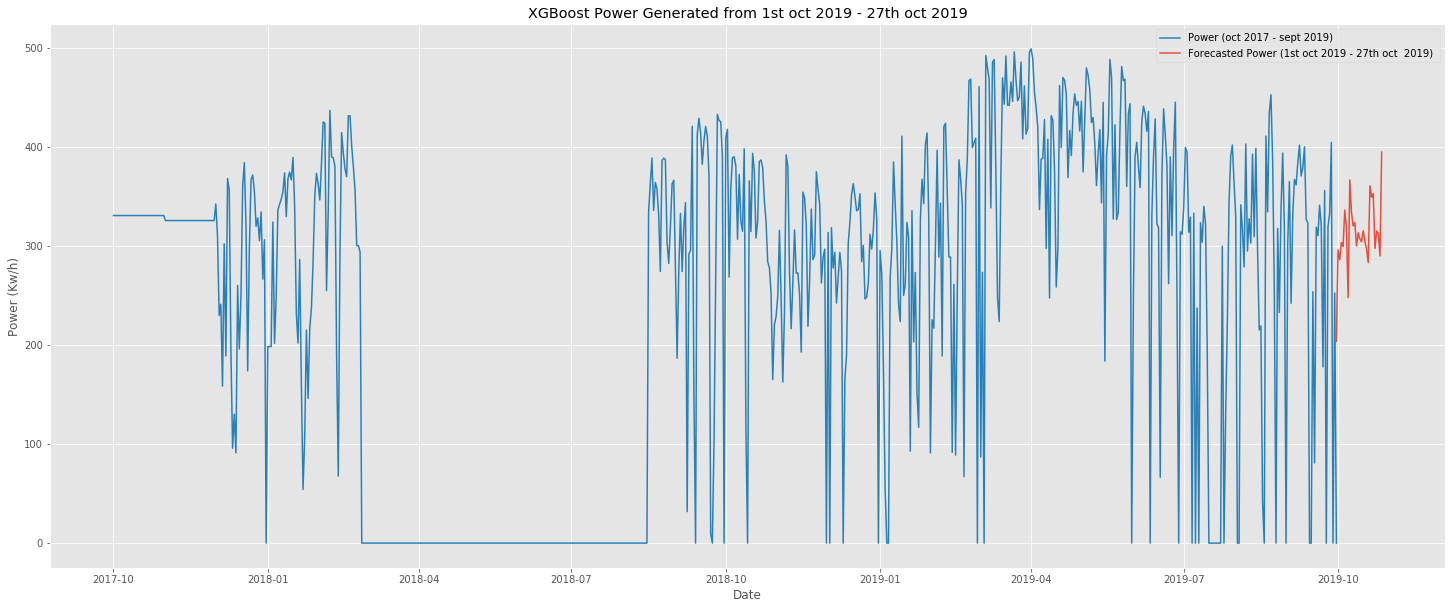

In [232]:
# Power Generated from 1st oct 2019 - 27th oct 2019
final_weather['power1'].plot(grid=True, figsize=(25,10), label='Power (oct 2017 - sept 2019)',  color='#2980B9')
XGB_fp['XGB_Power'].plot(grid=True, figsize=(25,10), label='Forecasted Power (1st oct 2019 - 27th oct  2019) ',  color='#E74C3C')
plt.title('XGBoost Power Generated from 1st oct 2019 - 27th oct 2019')
plt.xlabel("Date")
plt.ylabel("Power (Kw/h)")
plt.legend()

# SVM Model

In [236]:
from sklearn.svm import SVR

In [237]:
# Create a pipeline
svm_pipe = Pipeline([("regressor", SVR())])
# Create hyperparameters
grid_param = [
                {"regressor": [SVR()],
                 "regressor__kernel": ['linear', 'poly','rbf'],
                 "regressor__gamma": [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
                 "regressor__C": [1, 10, 100, 1000, 10000],
                 }]

SVM_model = GridSearchCV(svm_pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
SVM_model.fit(n_x_train,y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('regressor', SVR())]), n_jobs=-1,
             param_grid=[{'regressor': [SVR(C=10, gamma=0.6, kernel='poly')],
                          'regressor__C': [1, 10, 100, 1000, 10000],
                          'regressor__gamma': [0.0001, 0.001, 0.01, 0.1, 0.2,
                                               0.5, 0.6, 0.9],
                          'regressor__kernel': ['linear', 'poly', 'rbf']}])

In [238]:
print(SVM_model.best_estimator_)

Pipeline(steps=[('regressor', SVR(C=10, gamma=0.6, kernel='poly'))])


In [239]:
y_pred_SVM=SVM_model.predict(n_ff_weather)
y_pred_SVM

array([325.70938811, 324.7403435 , 324.8472321 , 327.69914756,
       323.77686154, 328.88236404, 329.96765517, 332.93199863,
       328.8869161 , 325.5472211 , 326.33787904, 325.43946119,
       327.73048338, 327.16451781, 325.96027131, 326.65500899,
       325.65408999, 326.88524697, 325.14582405, 324.29581711,
       330.56730914, 330.2355349 , 330.50735088, 328.41792481,
       325.15831209, 325.57239599, 325.02876616, 330.95825494])

In [240]:
score_SVM=SVM_model.score(n_ff_weather,y_pred_SVM)
score_SVM

1.0

In [241]:
SVM_FPower=pd.DataFrame(y_pred_SVM,columns=['SVM_Power'])
SVM_FPower.head()

,SVM_Power
0,325.709388
1,324.740344
2,324.847232
3,327.699148
4,323.776862


In [243]:
# joining forecast_date and SVM_Forecasted Power Datasets
SVM_fp=forecast_date.join(SVM_FPower)
SVM_fp.head()

,date,SVM_Power
0,2019-09-30,325.709388
1,2019-10-01,324.740344
2,2019-10-02,324.847232
3,2019-10-03,327.699148
4,2019-10-04,323.776862


In [299]:
SVM_fp.to_csv('SVR_Result.csv')

In [244]:
SVM_fp.set_index('date',inplace=True)
SVM_fp.head()

,SVM_Power
date,
2019-09-30,325.709388
2019-10-01,324.740344
2019-10-02,324.847232
2019-10-03,327.699148
2019-10-04,323.776862


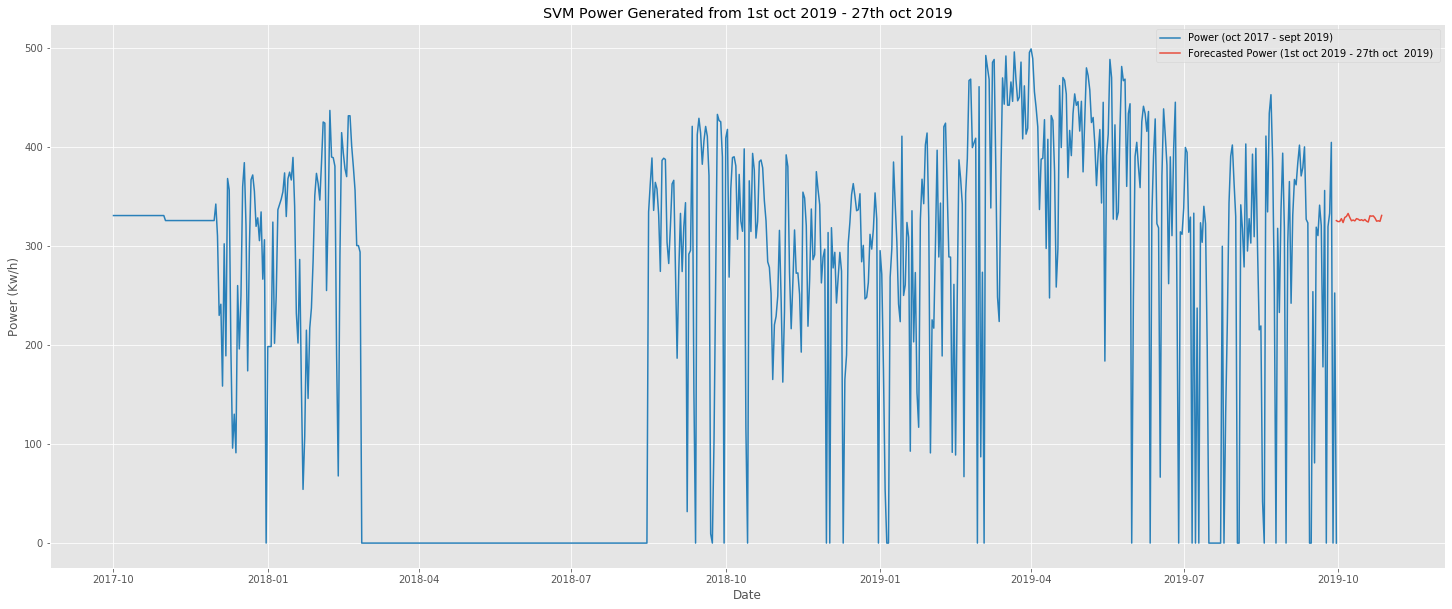

In [245]:
# Power Generated from 1st oct 2019 - 27th oct 2019
final_weather['power1'].plot(grid=True, figsize=(25,10), label='Power (oct 2017 - sept 2019)',  color='#2980B9')
SVM_fp['SVM_Power'].plot(grid=True, figsize=(25,10), label='Forecasted Power (1st oct 2019 - 27th oct  2019) ',  color='#E74C3C')
plt.title('SVM Power Generated from 1st oct 2019 - 27th oct 2019')
plt.xlabel("Date")
plt.ylabel("Power (Kw/h)")
plt.legend()

# SARIMA

ARMA - Autoregression (P) Integrated (d) Moving Average(q)

In [246]:
#plot_acf & plot_pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

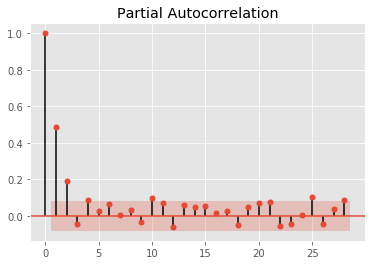

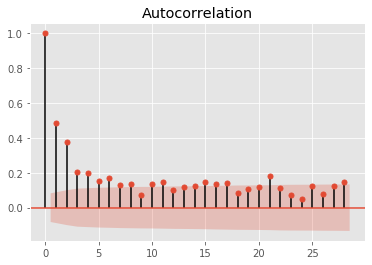

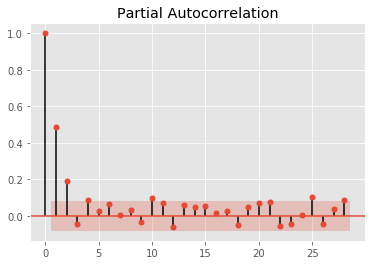

In [247]:
#plot_acf - (q)
#plot_pacf - (p)

plot_acf(final_weather['power1'])
plot_pacf(final_weather['power1'])

p = 3 ; d=1 ; q = 9  ; [  d=0(no stationarity ) d=1(stationarity )  ]

In [252]:
#Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model [SARIMAX]
import statsmodels.api as sm
SARIMA_model=sm.tsa.statespace.SARIMAX(final_weather['power1'],order=(3, 1, 9),seasonal_order=(1,1,1,9))
results=SARIMA_model.fit()


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [284]:
SARIMA_FPower=results.predict(start=568,end=597,dynamic=True)
SARIMA_FPower

568    214.937731
569    169.733160
570    275.437148
571    213.534341
572    229.486922
573    215.407788
574    286.807698
575    236.343195
576    275.770400
577    253.614916
578    227.702328
579    239.226638
580    218.756025
581    226.338557
582    246.683135
583    235.861690
584    245.598024
585    245.271257
586    233.109025
587    234.784894
588    232.652873
589    211.001655
590    238.984802
591    225.388788
592    245.567672
593    248.789234
594    230.856942
595    247.590357
596    227.121415
597    222.665108
dtype: float64

In [300]:
SARIMA_FPower.to_csv('SARIMAA_Result.csv')

# Neural Networks

In [285]:
from sklearn.neural_network import MLPRegressor

In [286]:
# Create a pipeline
MLP_pipe = Pipeline([("regressor", MLPRegressor())])
# Create hyperparameters
grid_param = [
                {"regressor": [MLPRegressor()],
                 "regressor__activation": ['relu','identity', 'tanh','logistic'],
                 "regressor__solver": ['lbfgs','sgd', 'adam'],
                 "regressor__learning_rate": ['constant','invscaling','adaptive'],
                 "regressor__max_iter":[200,300,400,500,1000]
                 }]

MLP_model = GridSearchCV(MLP_pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
MLP_model.fit(n_x_train,y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('regressor', MLPRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [MLPRegressor(activation='identity',
                                                     max_iter=1000,
                                                     solver='sgd')],
                          'regressor__activation': ['relu', 'identity', 'tanh',
                                                    'logistic'],
                          'regressor__learning_rate': ['constant', 'invscaling',
                                                       'adaptive'],
                          'regressor__max_iter': [200, 300, 400, 500, 1000],
                          'regressor__solver': ['lbfgs', 'sgd', 'adam']}])

In [287]:
print(MLP_model.best_estimator_)

Pipeline(steps=[('regressor',
                 MLPRegressor(activation='identity', max_iter=1000,
                              solver='sgd'))])


In [288]:
y_pred_MLP=MLP_model.predict(n_ff_weather)
y_pred_MLP

array([282.56839037, 271.61232641, 272.7511031 , 303.54427433,
       260.66556531, 315.72796575, 327.148485  , 357.74187143,
       315.91853031, 280.42775419, 288.81906648, 279.11883545,
       303.79866694, 297.83896693, 285.01473612, 292.58235204,
       281.73537206, 294.97827753, 276.14807014, 266.58890412,
       333.30767689, 329.93969936, 332.70517192, 311.06025448,
       276.22615539, 280.74187535, 275.1427907 , 337.75717314])

In [289]:
score_MLP=MLP_model.score(n_ff_weather,y_pred_MLP)
score_MLP

1.0

In [290]:
MLP_FPower=pd.DataFrame(y_pred_MLP,columns=['MLP_Power'])
MLP_FPower.head()

,MLP_Power
0,282.568390
1,271.612326
2,272.751103
3,303.544274
4,260.665565


In [291]:
# joining forecast_date and MLP_FPower Power Datasets
MLP_fp=forecast_date.join(MLP_FPower)
MLP_fp.head()

,date,MLP_Power
0,2019-09-30,282.568390
1,2019-10-01,271.612326
2,2019-10-02,272.751103
3,2019-10-03,303.544274
4,2019-10-04,260.665565


In [301]:
MLP_fp.to_csv('MLP_result.csv')

In [292]:
MLP_fp.set_index('date',inplace=True)
MLP_fp.head()

,MLP_Power
date,
2019-09-30,282.568390
2019-10-01,271.612326
2019-10-02,272.751103
2019-10-03,303.544274
2019-10-04,260.665565


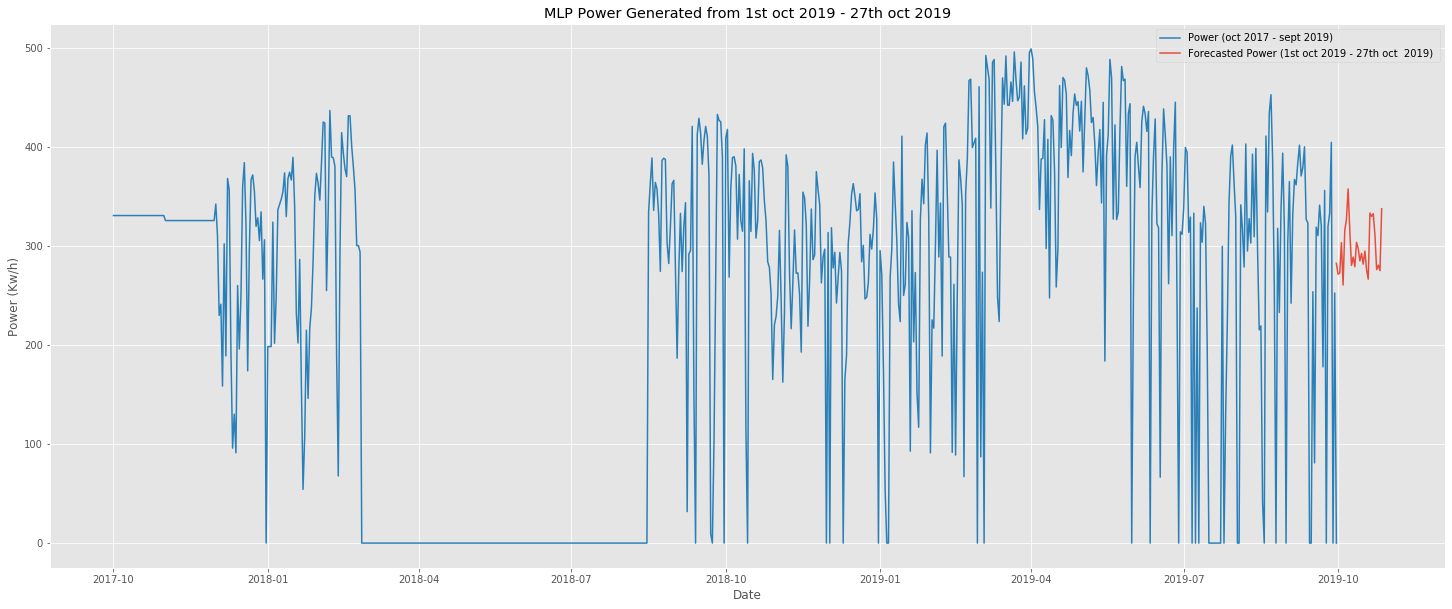

In [293]:
# Power Generated from 1st oct 2019 - 27th oct 2019
final_weather['power1'].plot(grid=True, figsize=(25,10), label='Power (oct 2017 - sept 2019)',  color='#2980B9')
MLP_fp['MLP_Power'].plot(grid=True, figsize=(25,10), label='Forecasted Power (1st oct 2019 - 27th oct  2019) ',  color='#E74C3C')
plt.title('MLP Power Generated from 1st oct 2019 - 27th oct 2019')
plt.xlabel("Date")
plt.ylabel("Power (Kw/h)")
plt.legend()